
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

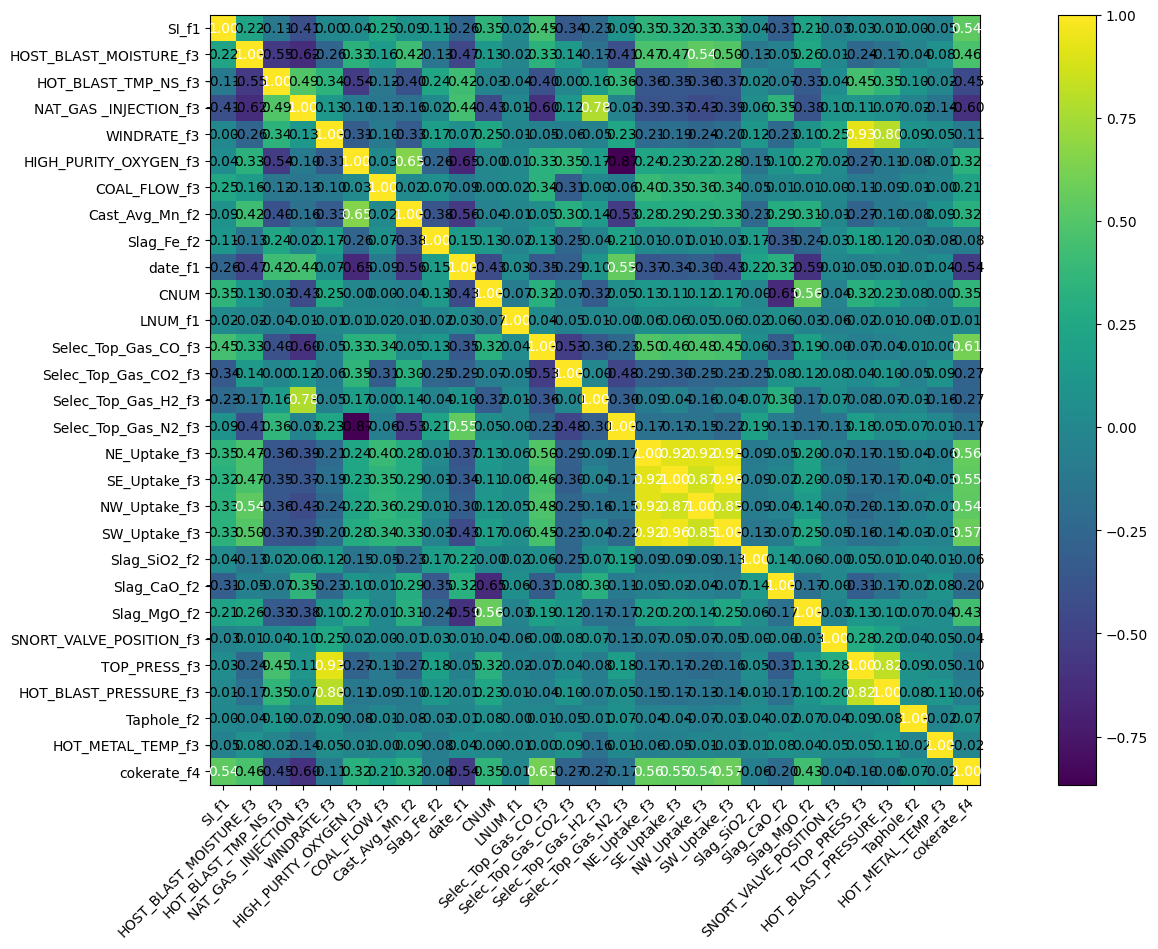

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

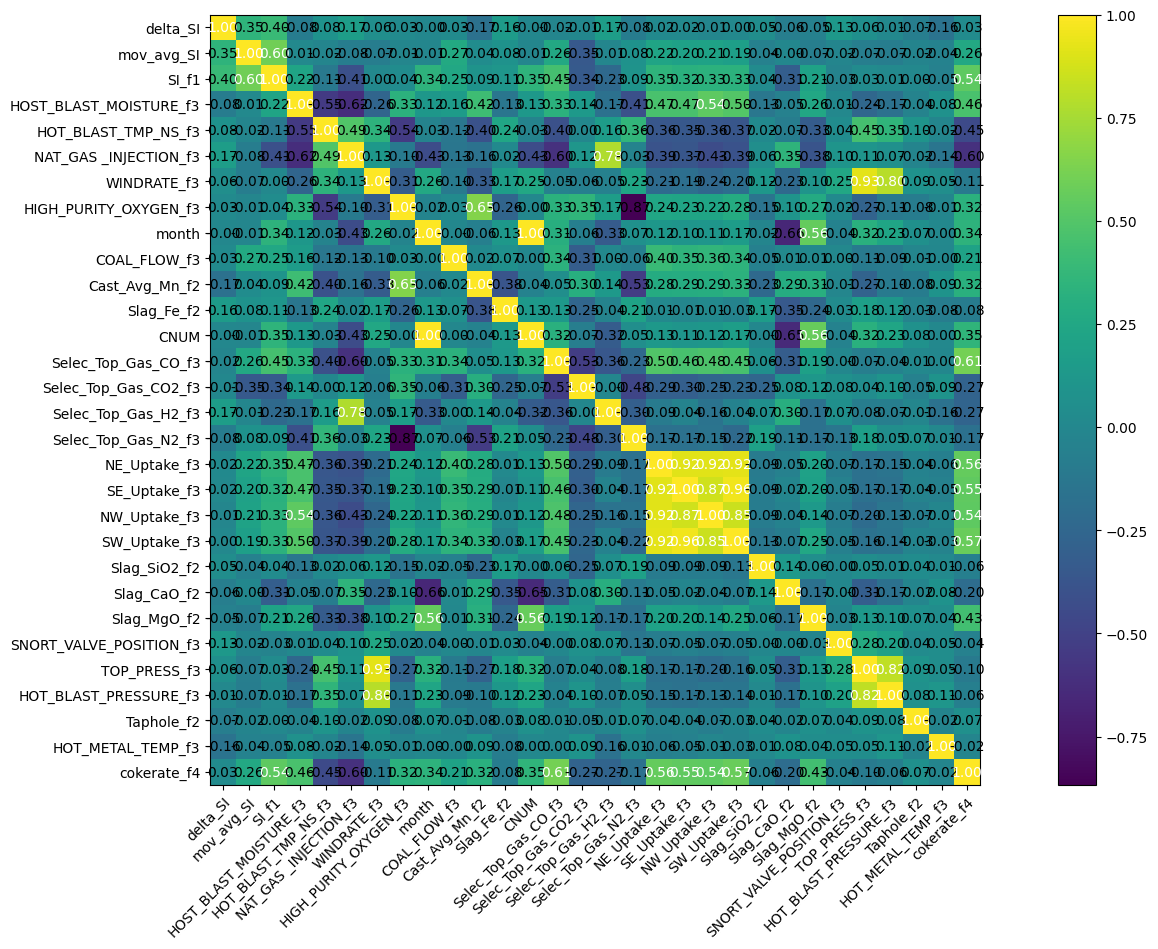

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 9.0
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        main_loss       = criterion(idx_pred[:, 8:], yb[:, 8:])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.195703
Loss_SI: 1.5966507196426392 Loss_all: 1.307328224182129
===
[200] Train Loss: 0.153103
Loss_SI: 0.39077410101890564 Loss_all: 0.35554805397987366
===
[400] Train Loss: 0.051411
Loss_SI: 0.33302709460258484 Loss_all: 0.32141491770744324
===
[600] Train Loss: 0.066972
Loss_SI: 0.3169664740562439 Loss_all: 0.3162837326526642
===
[800] Train Loss: 0.037516
Loss_SI: 0.23554158210754395 Loss_all: 0.26102539896965027
===


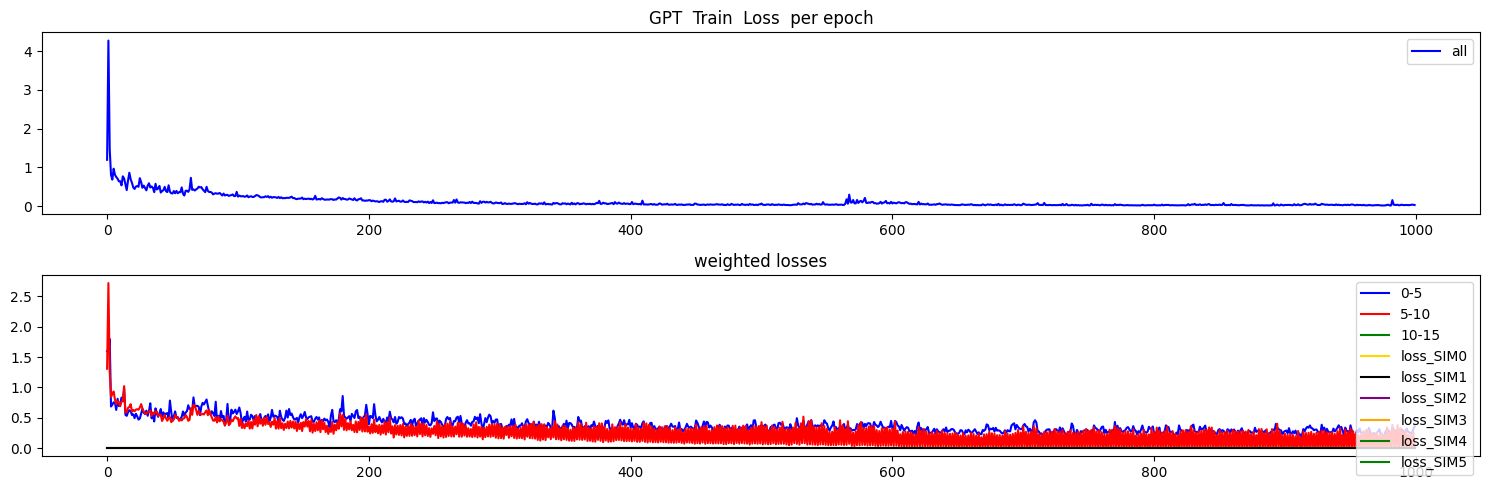

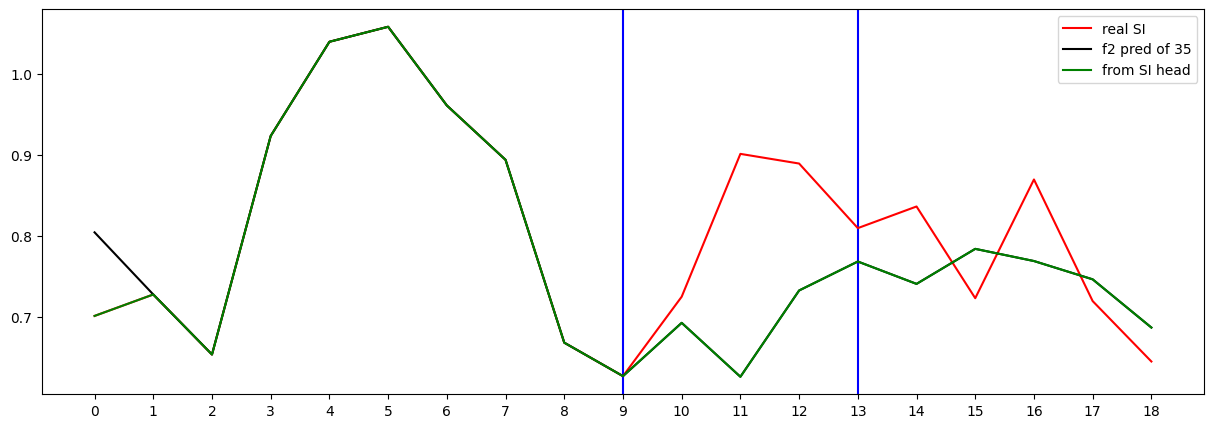

Testing R**2 - (all) - (no inputs):  0.9945115974278075
Testing R**2 - (f2) - SI full (no inputs):  -1.0721900827267792
Testing R**2 - SI head only (no inputs):  -1.0721900827267792
0 ...index R**2 (no inputs):  -0.337671463075097
1 ...index R**2 (no inputs):  -1.1184745084266585
2 ...index R**2 (no inputs):  -1.0721900827267792
3 ...index R**2 (no inputs):  -11.792815703321324
4 ...index R**2 (no inputs):  -16.7014282499924
5 ...index R**2 (no inputs):  0.027022678100611097
6 ...index R**2 (no inputs):  -21.382777487253616
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.07977714756709997
10 ...index R**2 (no inputs):  0.06797129240845823
11 ...index R**2 (no inputs):  -29.703103502645508
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.16271008166191514
16 ...index R**2 (no inputs):  -1.220488758910625
17 ...index R**2 (no inputs):  -7.722470410

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.981882
Loss_SI: 1.1887521743774414 Loss_all: 1.1924573183059692
===
[200] Train Loss: 0.157119
Loss_SI: 0.3860730528831482 Loss_all: 0.3768787384033203
===
[400] Train Loss: 0.085049
Loss_SI: 0.2853486239910126 Loss_all: 0.2930309474468231
===
[600] Train Loss: 0.047791
Loss_SI: 0.2629108130931854 Loss_all: 0.2695459723472595
===
[800] Train Loss: 0.055364
Loss_SI: 0.23159955441951752 Loss_all: 0.27729639410972595
===


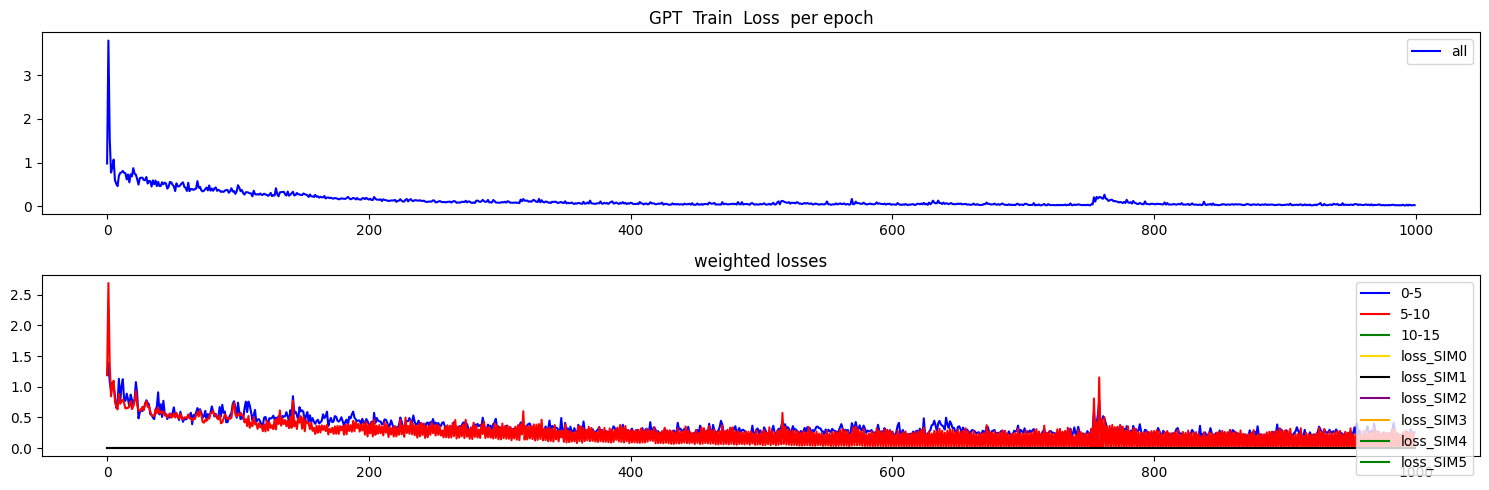

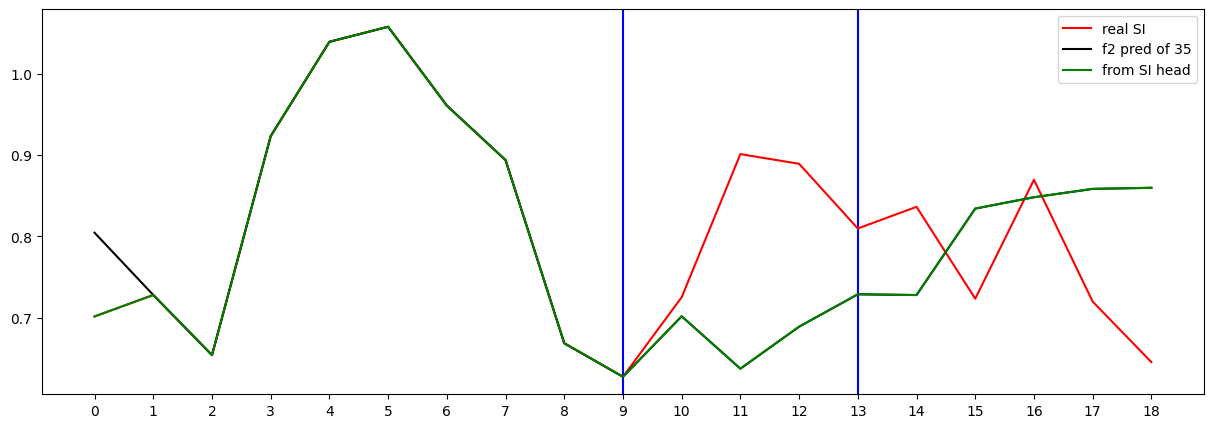

Testing R**2 - (all) - (no inputs):  0.9938496001249637
Testing R**2 - (f2) - SI full (no inputs):  -2.1452838545358532
Testing R**2 - SI head only (no inputs):  -2.1452838545358532
0 ...index R**2 (no inputs):  0.16435528885383655
1 ...index R**2 (no inputs):  -0.8088672870717841
2 ...index R**2 (no inputs):  -2.1452838545358532
3 ...index R**2 (no inputs):  -9.442219883554253
4 ...index R**2 (no inputs):  -2.868676702683398
5 ...index R**2 (no inputs):  -0.09166245689812591
6 ...index R**2 (no inputs):  -105.75517499803625
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.027932591888048974
10 ...index R**2 (no inputs):  0.3346989628219009
11 ...index R**2 (no inputs):  -80.40852339444838
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.2603494248480827
16 ...index R**2 (no inputs):  -2.1883098245992465
17 ...index R**2 (no inputs):  -16.73922564

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.283084
Loss_SI: 1.0847282409667969 Loss_all: 1.1400264501571655
===
[200] Train Loss: 0.255044
Loss_SI: 0.36557576060295105 Loss_all: 0.37683936953544617
===
[400] Train Loss: 0.094798
Loss_SI: 0.30593404173851013 Loss_all: 0.29940396547317505
===
[600] Train Loss: 0.086276
Loss_SI: 0.41865378618240356 Loss_all: 0.3078444004058838
===
[800] Train Loss: 0.029416
Loss_SI: 0.24367204308509827 Loss_all: 0.2469085156917572
===


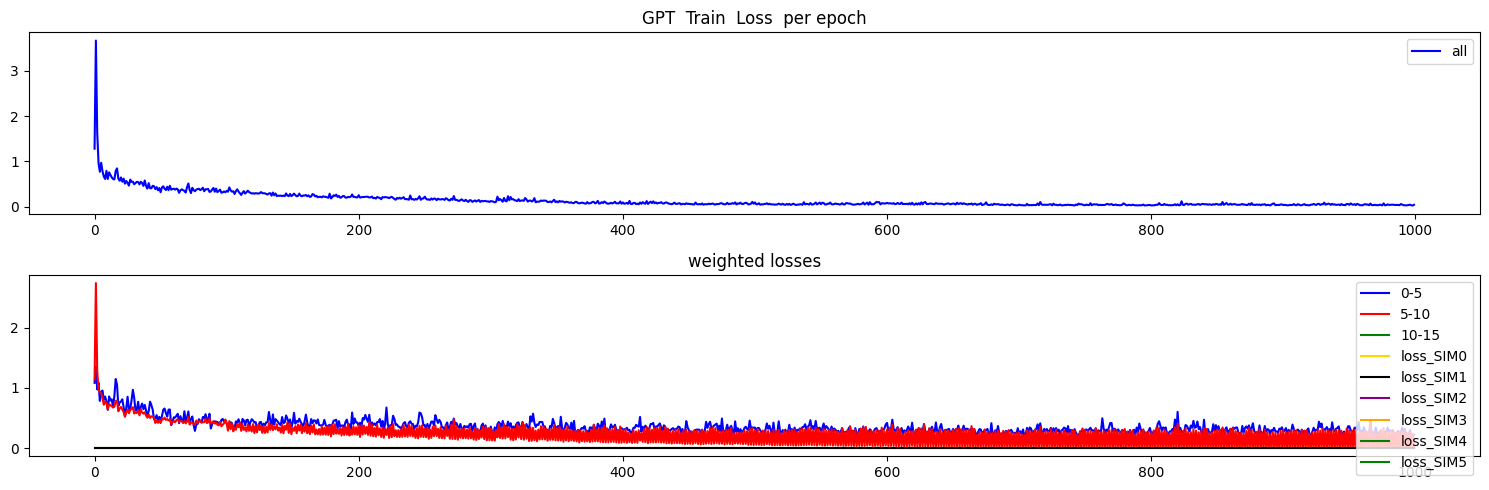

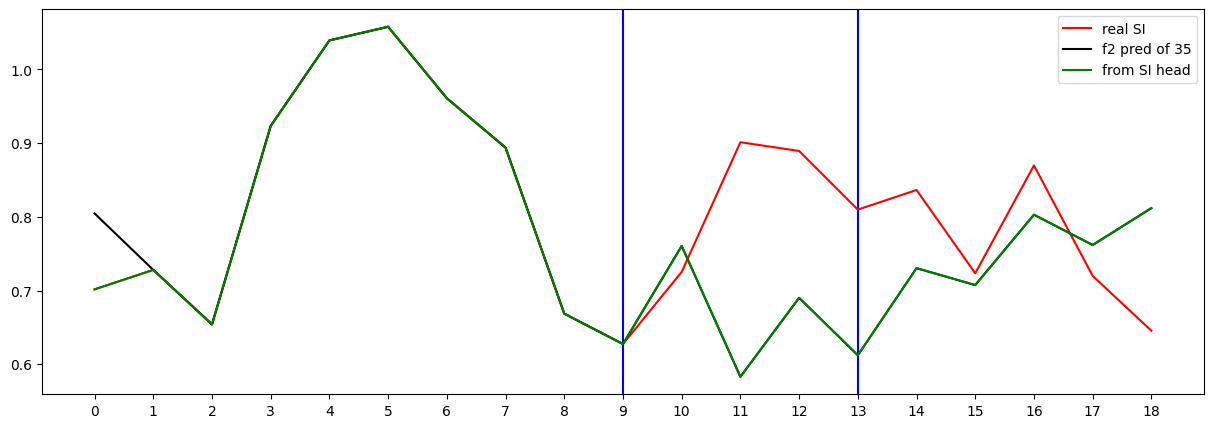

Testing R**2 - (all) - (no inputs):  0.9926492918399608
Testing R**2 - (f2) - SI full (no inputs):  -2.428578724898566
Testing R**2 - SI head only (no inputs):  -2.428578724898566
0 ...index R**2 (no inputs):  -1.2472465877583225
1 ...index R**2 (no inputs):  -0.38778208602084896
2 ...index R**2 (no inputs):  -2.428578724898566
3 ...index R**2 (no inputs):  -36.8326826390332
4 ...index R**2 (no inputs):  -93.27608466688847
5 ...index R**2 (no inputs):  -0.3022121544749239
6 ...index R**2 (no inputs):  -174.85494149076447
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.3130735993193968
10 ...index R**2 (no inputs):  -0.5217046801955405
11 ...index R**2 (no inputs):  -135.91152382651035
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.666494013011796
16 ...index R**2 (no inputs):  -1.3021723290343976
17 ...index R**2 (no inputs):  -22.5169949213663

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.329930
Loss_SI: 1.5320671796798706 Loss_all: 1.331520676612854
===
[200] Train Loss: 0.290237
Loss_SI: 0.7641019821166992 Loss_all: 0.44133684039115906
===
[400] Train Loss: 0.140628
Loss_SI: 0.4104004502296448 Loss_all: 0.3231903910636902
===
[600] Train Loss: 0.068153
Loss_SI: 0.3139404058456421 Loss_all: 0.2966352105140686
===
[800] Train Loss: 0.091691
Loss_SI: 0.3059385120868683 Loss_all: 0.3115360140800476
===


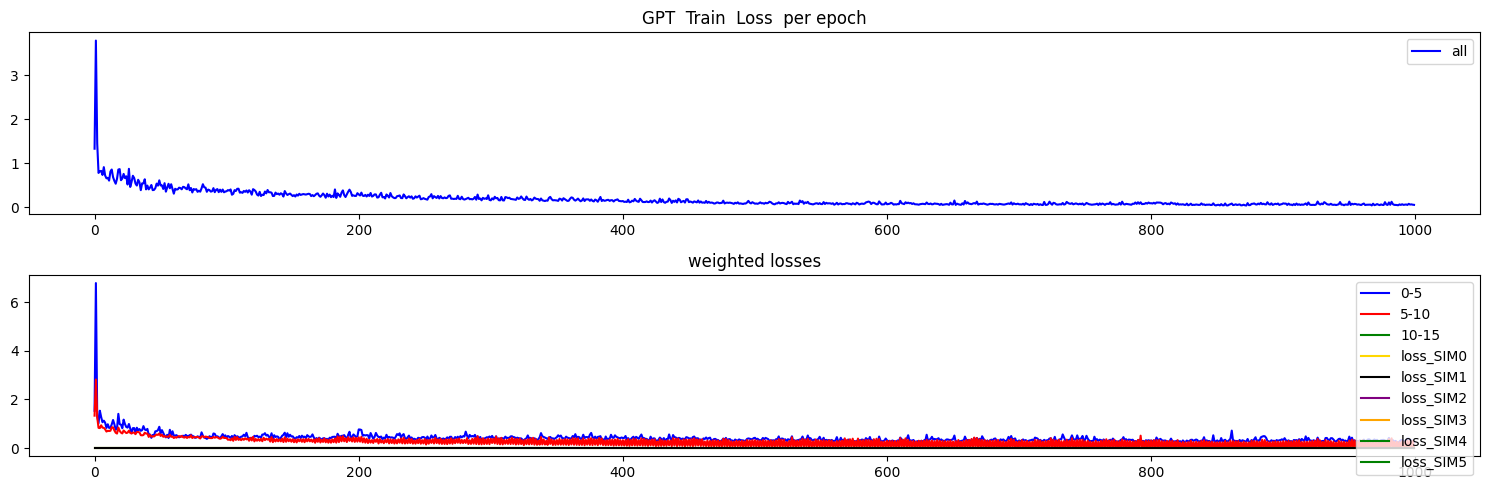

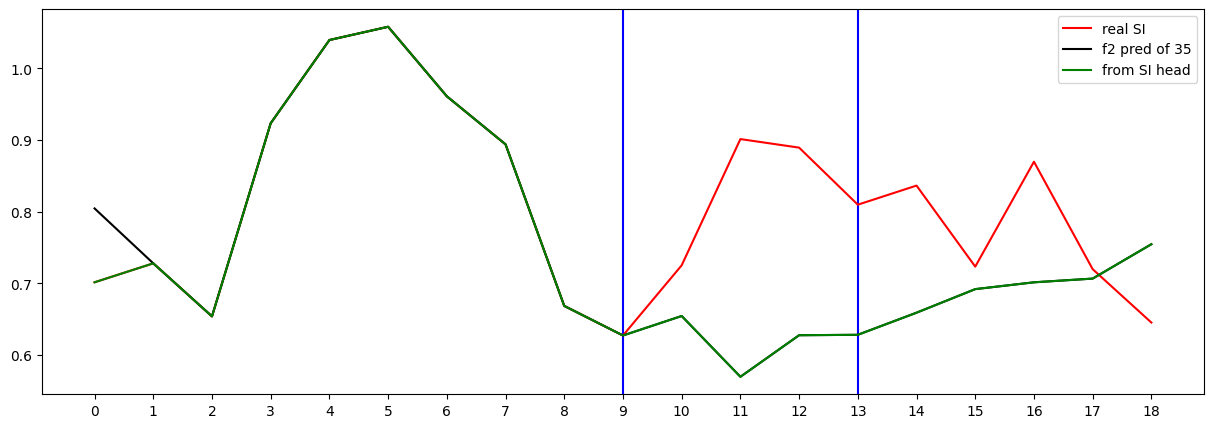

Testing R**2 - (all) - (no inputs):  0.9938464416474452
Testing R**2 - (f2) - SI full (no inputs):  -3.074855531285822
Testing R**2 - SI head only (no inputs):  -3.074855531285822
0 ...index R**2 (no inputs):  -0.36858281587085906
1 ...index R**2 (no inputs):  -3.332482744078467
2 ...index R**2 (no inputs):  -3.074855531285822
3 ...index R**2 (no inputs):  -1.0873986404330154
4 ...index R**2 (no inputs):  -17.303283067450167
5 ...index R**2 (no inputs):  -0.08886491013643827
6 ...index R**2 (no inputs):  -114.50434587809775
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.04556797042991334
10 ...index R**2 (no inputs):  -0.20671400726047295
11 ...index R**2 (no inputs):  -96.82760070267504
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.236490192720696
16 ...index R**2 (no inputs):  -0.6214744268089212
17 ...index R**2 (no inputs):  -269.88590698

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.221480
Loss_SI: 1.466494083404541 Loss_all: 1.3411672115325928
===
[200] Train Loss: 0.076181
Loss_SI: 0.28744858503341675 Loss_all: 0.33403298258781433
===
[400] Train Loss: 0.024364
Loss_SI: 0.8561267852783203 Loss_all: 0.35118281841278076
===
[600] Train Loss: 0.057088
Loss_SI: 0.5222694277763367 Loss_all: 0.3274393081665039
===
[800] Train Loss: 0.021207
Loss_SI: 0.45663881301879883 Loss_all: 0.30835938453674316
===


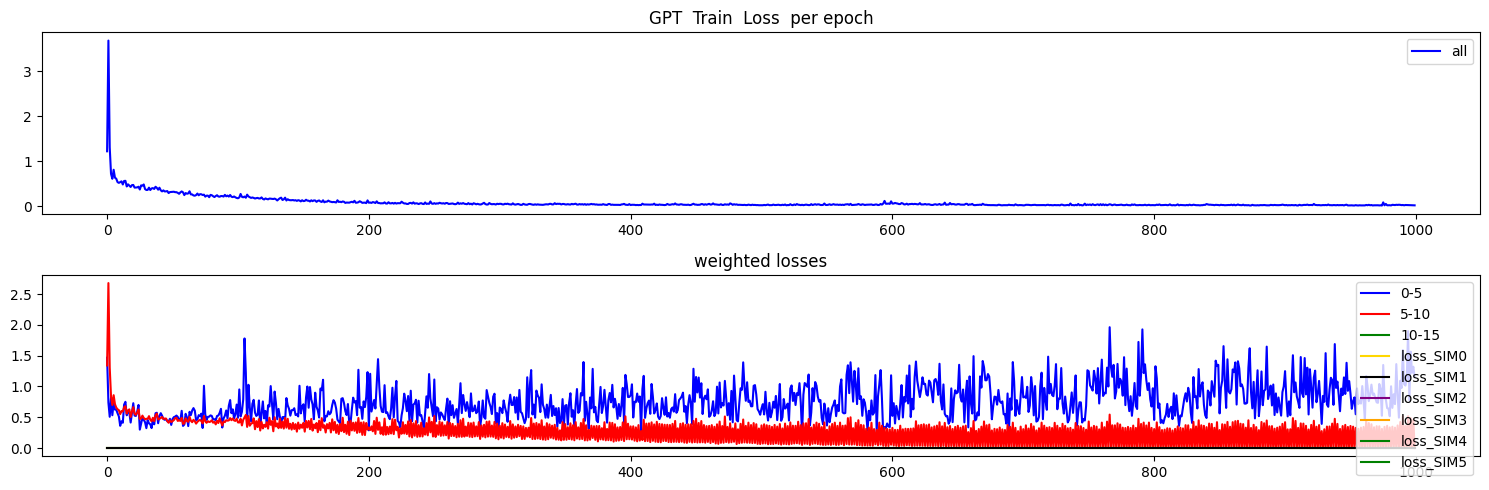

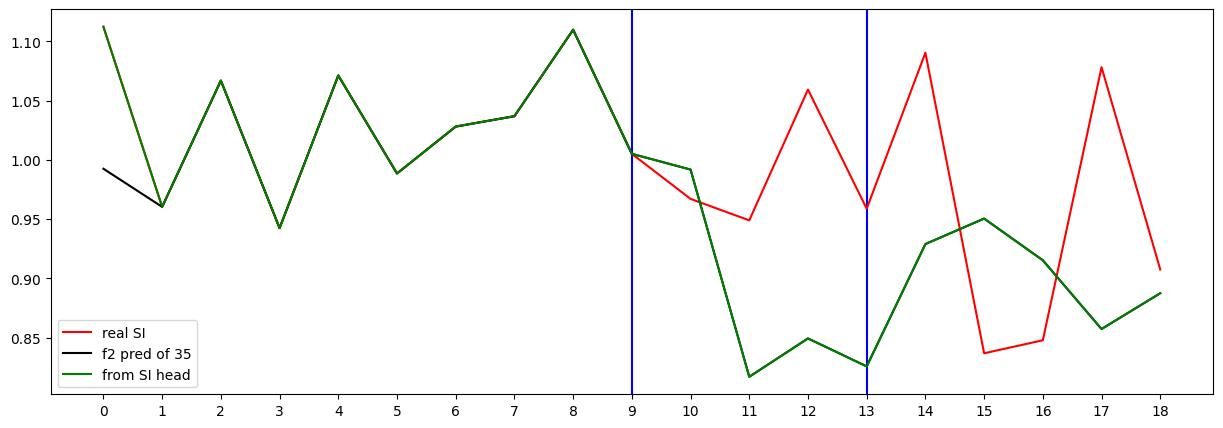

Testing R**2 - (all) - (no inputs):  0.9674259023634525
Testing R**2 - (f2) - SI full (no inputs):  -1.6735119318103724
Testing R**2 - SI head only (no inputs):  -1.6735119318103724
0 ...index R**2 (no inputs):  -0.3761304513584618
1 ...index R**2 (no inputs):  -0.6123660720938107
2 ...index R**2 (no inputs):  -1.6735119318103724
3 ...index R**2 (no inputs):  -27.121195028320187
4 ...index R**2 (no inputs):  -13.79827065053666
5 ...index R**2 (no inputs):  -15.031224986365793
6 ...index R**2 (no inputs):  -14.789181786372264
7 ...index R**2 (no inputs):  -53.28778228616734
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.33203490960037474
10 ...index R**2 (no inputs):  0.26835995836684134
11 ...index R**2 (no inputs):  -4178.302639253053
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.8562857405092008
16 ...index R**2 (no inputs):  0.09710152272061012
17 ...index R**2 (no inputs

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.150120
Loss_SI: 1.0734779834747314 Loss_all: 1.1027098894119263
===
[200] Train Loss: 0.179027
Loss_SI: 0.18487252295017242 Loss_all: 0.32827532291412354
===
[400] Train Loss: 0.070821
Loss_SI: 0.26927292346954346 Loss_all: 0.2822848856449127
===
[600] Train Loss: 0.042600
Loss_SI: 0.25881868600845337 Loss_all: 0.2748388648033142
===
[800] Train Loss: 0.032859
Loss_SI: 0.27148985862731934 Loss_all: 0.30352136492729187
===


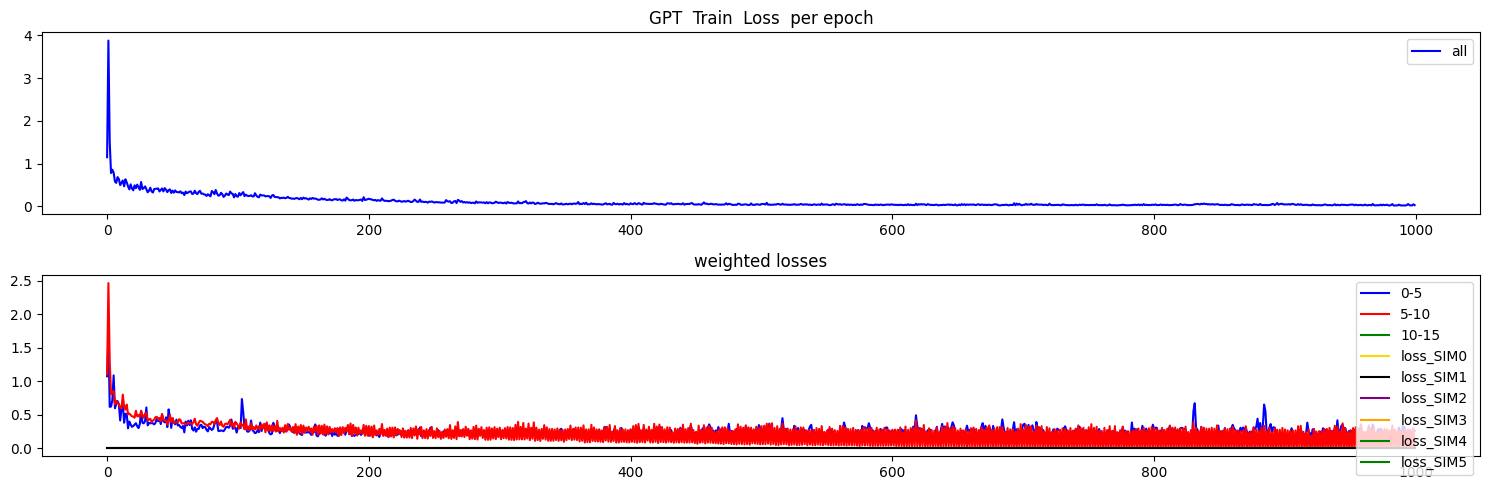

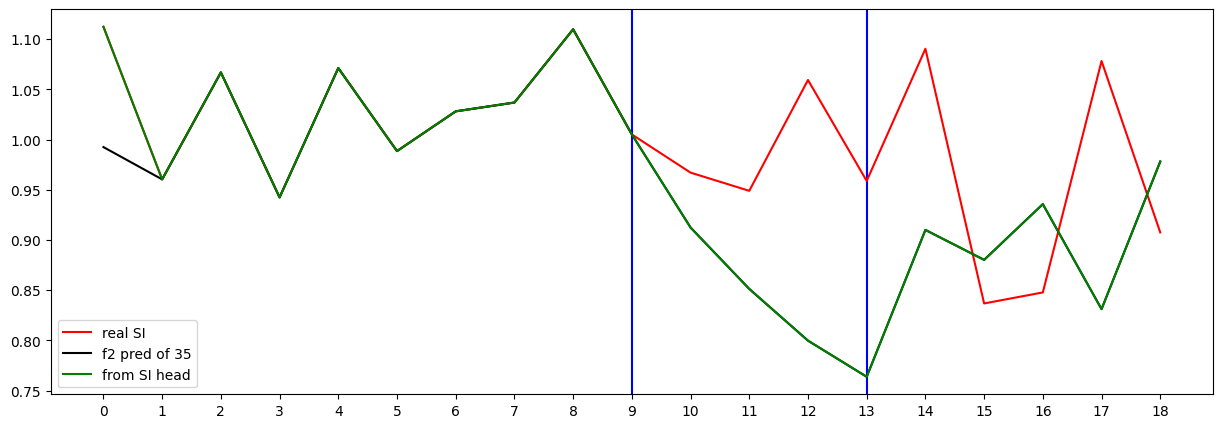

Testing R**2 - (all) - (no inputs):  0.9557687161382125
Testing R**2 - (f2) - SI full (no inputs):  -1.5170389185670516
Testing R**2 - SI head only (no inputs):  -1.5170389185670516
0 ...index R**2 (no inputs):  -0.24654288755525267
1 ...index R**2 (no inputs):  -0.599586915965048
2 ...index R**2 (no inputs):  -1.5170389185670516
3 ...index R**2 (no inputs):  -22.328109623527137
4 ...index R**2 (no inputs):  -87.16486695376423
5 ...index R**2 (no inputs):  -20.777676667874193
6 ...index R**2 (no inputs):  -21.780947544662556
7 ...index R**2 (no inputs):  -881.8863857268856
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.277513601748148
10 ...index R**2 (no inputs):  -0.36883381367860113
11 ...index R**2 (no inputs):  -4479.273344390262
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.2559800608152125
16 ...index R**2 (no inputs):  -0.3939875116919893
17 ...index R**2 (no inputs)

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.192240
Loss_SI: 1.794350504875183 Loss_all: 1.2241723537445068
===
[200] Train Loss: 0.172259
Loss_SI: 0.2140306681394577 Loss_all: 0.2566775381565094
===
[400] Train Loss: 0.112381
Loss_SI: 0.2644454538822174 Loss_all: 0.2619144320487976
===
[600] Train Loss: 0.087531
Loss_SI: 0.242679163813591 Loss_all: 0.24005796015262604
===
[800] Train Loss: 0.069486
Loss_SI: 0.2884703576564789 Loss_all: 0.27681493759155273
===


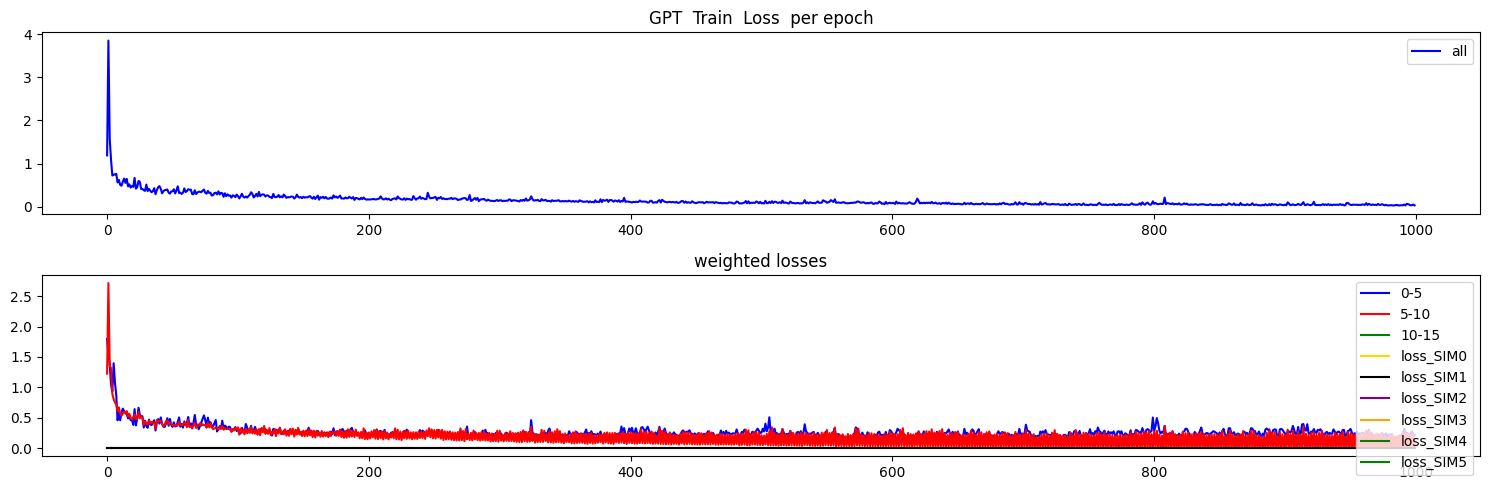

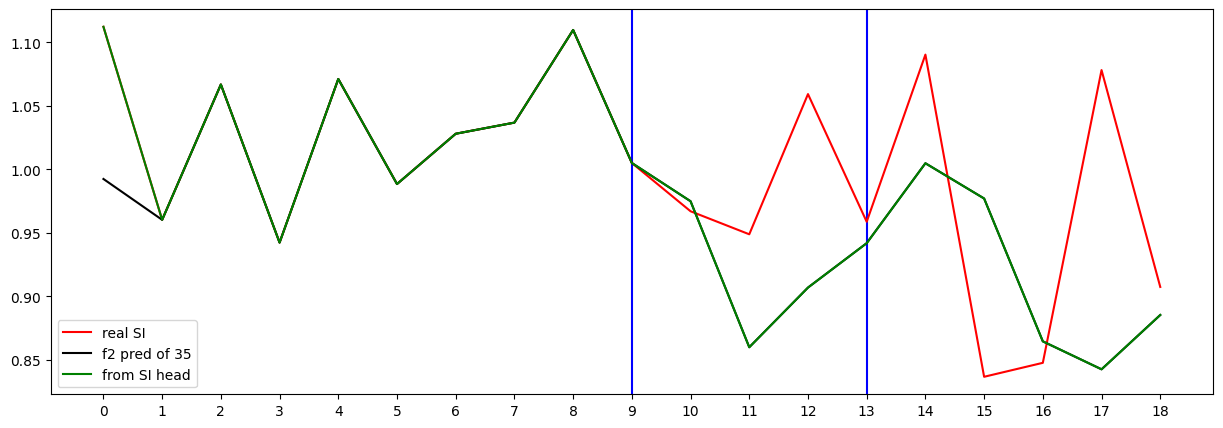

Testing R**2 - (all) - (no inputs):  0.9747386835166225
Testing R**2 - (f2) - SI full (no inputs):  -1.3421500295413473
Testing R**2 - SI head only (no inputs):  -1.3421500295413473
0 ...index R**2 (no inputs):  -0.5187454848258026
1 ...index R**2 (no inputs):  -2.5740115585206977
2 ...index R**2 (no inputs):  -1.3421500295413473
3 ...index R**2 (no inputs):  -45.874054375720654
4 ...index R**2 (no inputs):  -42.24959978852574
5 ...index R**2 (no inputs):  -11.42788951155463
6 ...index R**2 (no inputs):  -35.31188677874058
7 ...index R**2 (no inputs):  -1359.0914888821956
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.20368684088373246
10 ...index R**2 (no inputs):  0.16183810332779713
11 ...index R**2 (no inputs):  -4331.617952336905
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.2161142832969265
16 ...index R**2 (no inputs):  -0.41273003868277924
17 ...index R**2 (no inputs

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.163840
Loss_SI: 1.0901587009429932 Loss_all: 1.2531509399414062
===
[200] Train Loss: 0.209183
Loss_SI: 0.18861432373523712 Loss_all: 0.2508717179298401
===
[400] Train Loss: 0.137175
Loss_SI: 0.1605914831161499 Loss_all: 0.20793269574642181
===
[600] Train Loss: 0.079731
Loss_SI: 0.2118546962738037 Loss_all: 0.2146393209695816
===
[800] Train Loss: 0.074522
Loss_SI: 0.19669432938098907 Loss_all: 0.2218485176563263
===


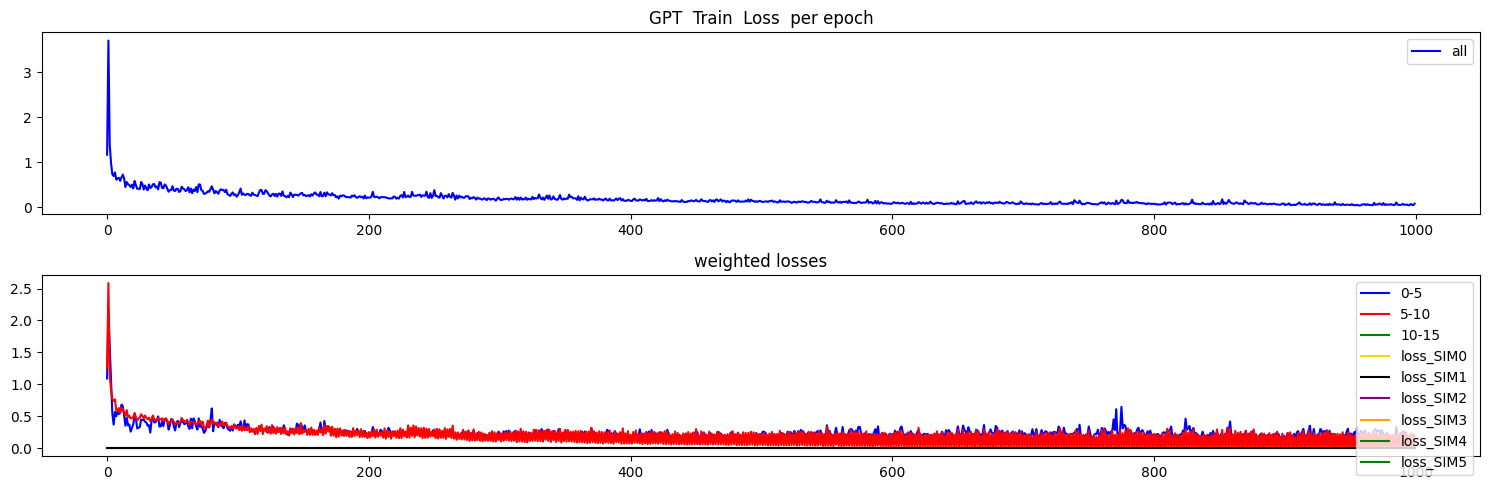

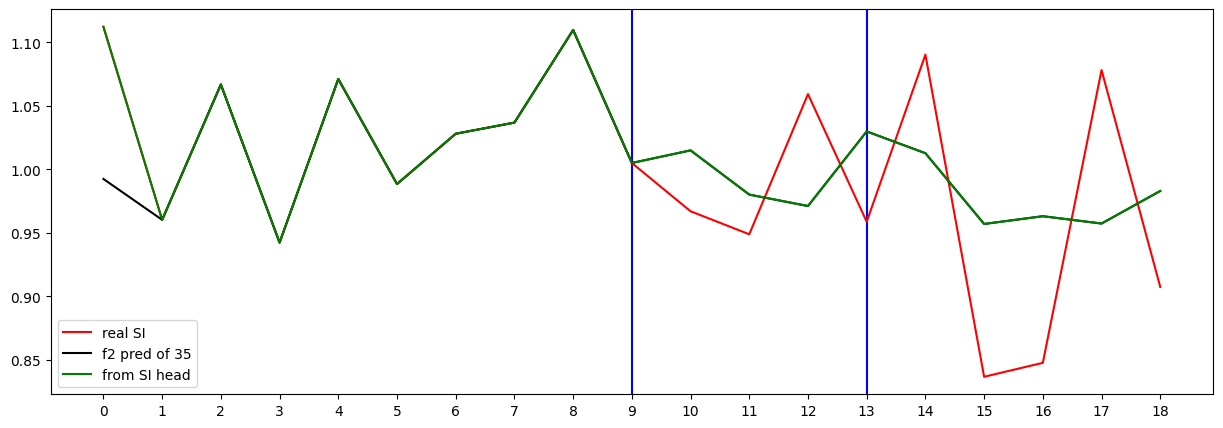

Testing R**2 - (all) - (no inputs):  0.9724322029780313
Testing R**2 - (f2) - SI full (no inputs):  0.005110501313292937
Testing R**2 - SI head only (no inputs):  0.005110501313292937
0 ...index R**2 (no inputs):  0.03559902209250543
1 ...index R**2 (no inputs):  -0.48908149379478627
2 ...index R**2 (no inputs):  0.005110501313292937
3 ...index R**2 (no inputs):  -46.17563284566267
4 ...index R**2 (no inputs):  -100.40078490593741
5 ...index R**2 (no inputs):  -12.226448797761652
6 ...index R**2 (no inputs):  -284.7261366735343
7 ...index R**2 (no inputs):  -2419.2174699974767
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.0058109166105291266
10 ...index R**2 (no inputs):  -0.9089192300785816
11 ...index R**2 (no inputs):  -4399.22887742484
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.0280658390063175
16 ...index R**2 (no inputs):  -0.045247178401481625
17 ...index R**2 (no 

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [35]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.102299
Loss_SI: 1.380745768547058 Loss_all: 1.1905690431594849
===
[200] Train Loss: 0.056921
Loss_SI: 0.32415086030960083 Loss_all: 0.3790210783481598
===
[400] Train Loss: 0.028215
Loss_SI: 0.36552509665489197 Loss_all: 0.3763807713985443
===
[600] Train Loss: 0.023274
Loss_SI: 0.412253201007843 Loss_all: 0.4457387328147888
===
[800] Train Loss: 0.048085
Loss_SI: 0.6027132868766785 Loss_all: 0.5800768733024597
===


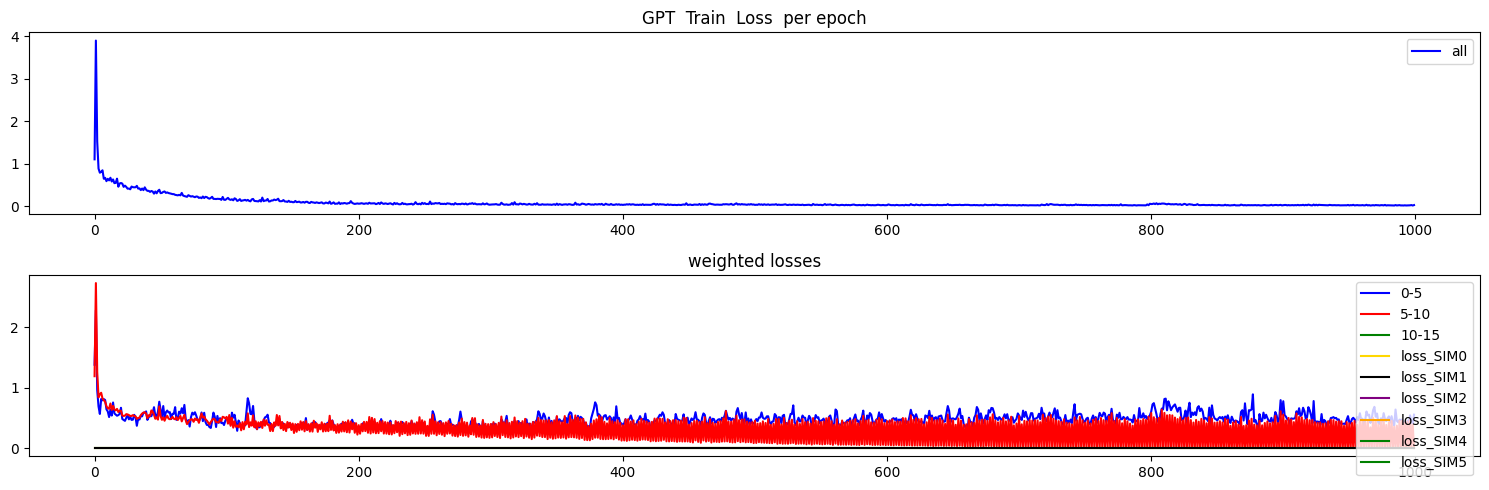

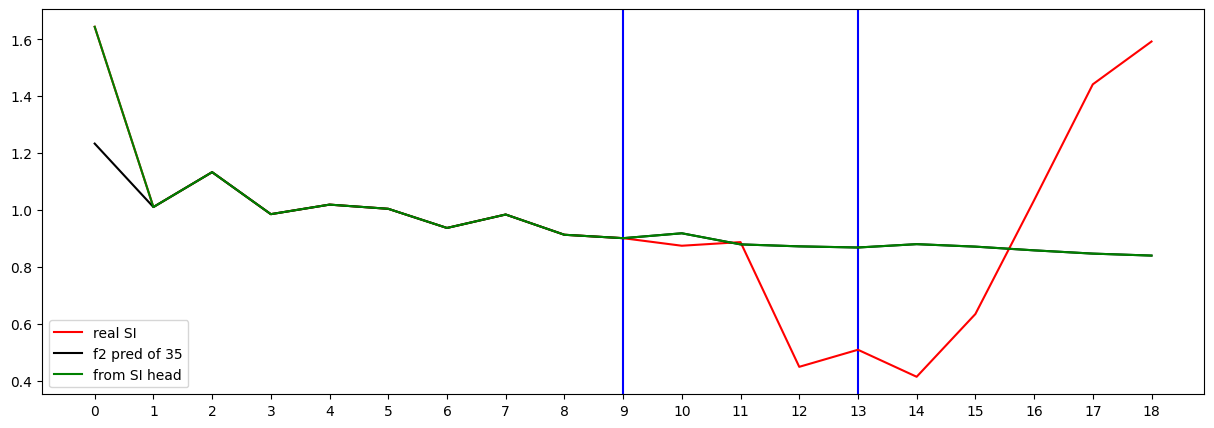

Testing R**2 - (all) - (no inputs):  0.9068253963473573
Testing R**2 - (f2) - SI full (no inputs):  -0.08839386025271456
Testing R**2 - SI head only (no inputs):  -0.08839386025271456
0 ...index R**2 (no inputs):  -0.23702588744246822
1 ...index R**2 (no inputs):  0.052368990772738155
2 ...index R**2 (no inputs):  -0.08839386025271456
3 ...index R**2 (no inputs):  -0.6836628682068706
4 ...index R**2 (no inputs):  -0.09241698861125536
5 ...index R**2 (no inputs):  -0.16775266393427168
6 ...index R**2 (no inputs):  -0.9591567725432681
7 ...index R**2 (no inputs):  -0.30304871633929675
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5887138585104357
10 ...index R**2 (no inputs):  -0.7140002482899563
11 ...index R**2 (no inputs):  -13.63519022737898
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8744420355148832
16 ...index R**2 (no inputs):  -0.5970866322990809
17 ...index R**2 (

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.144762
Loss_SI: 1.0897899866104126 Loss_all: 1.1577168703079224
===
[200] Train Loss: 0.128907
Loss_SI: 0.7387810945510864 Loss_all: 0.3946842551231384
===
[400] Train Loss: 0.056807
Loss_SI: 0.5044786334037781 Loss_all: 0.33666595816612244
===
[600] Train Loss: 0.044408
Loss_SI: 0.6979367136955261 Loss_all: 0.3868347108364105
===
[800] Train Loss: 0.026087
Loss_SI: 0.38647887110710144 Loss_all: 0.3464261591434479
===


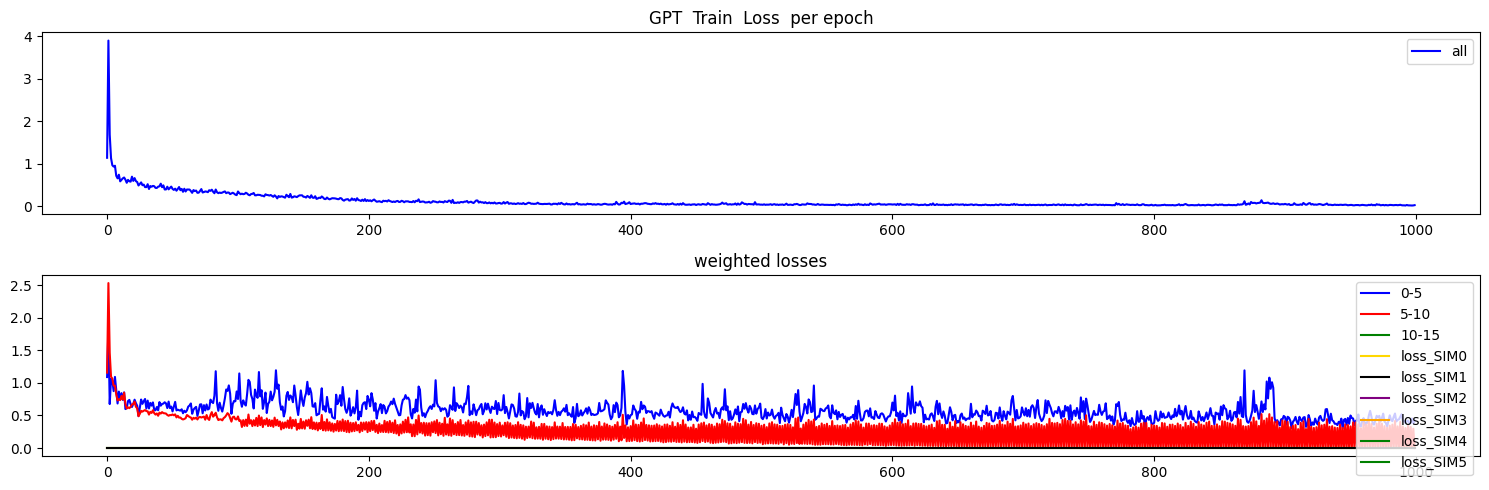

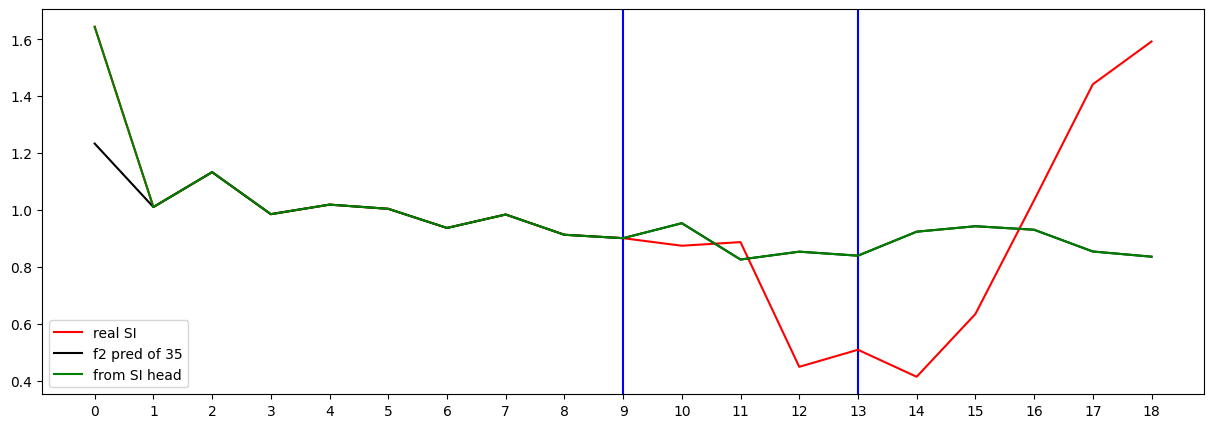

Testing R**2 - (all) - (no inputs):  0.9104299277609487
Testing R**2 - (f2) - SI full (no inputs):  -0.009150148673118474
Testing R**2 - SI head only (no inputs):  -0.009150148673118474
0 ...index R**2 (no inputs):  0.06623717217523684
1 ...index R**2 (no inputs):  0.21343281498088518
2 ...index R**2 (no inputs):  -0.009150148673118474
3 ...index R**2 (no inputs):  -1.3939621320845084
4 ...index R**2 (no inputs):  -0.19649351407619453
5 ...index R**2 (no inputs):  -0.12141393289349822
6 ...index R**2 (no inputs):  -2.8190314574235504
7 ...index R**2 (no inputs):  -0.1847768577462907
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5504699128073287
10 ...index R**2 (no inputs):  0.3487089117272598
11 ...index R**2 (no inputs):  -192.7341461298481
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6935736922568296
16 ...index R**2 (no inputs):  -0.23215432778762368
17 ...index R**2 (

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.327923
Loss_SI: 1.475780725479126 Loss_all: 1.4101475477218628
===
[200] Train Loss: 0.235178
Loss_SI: 0.3237558901309967 Loss_all: 0.37037450075149536
===
[400] Train Loss: 0.079129
Loss_SI: 0.30398109555244446 Loss_all: 0.27408310770988464
===
[600] Train Loss: 0.061847
Loss_SI: 0.272400826215744 Loss_all: 0.269002228975296
===
[800] Train Loss: 0.039931
Loss_SI: 0.33716049790382385 Loss_all: 0.2674667239189148
===


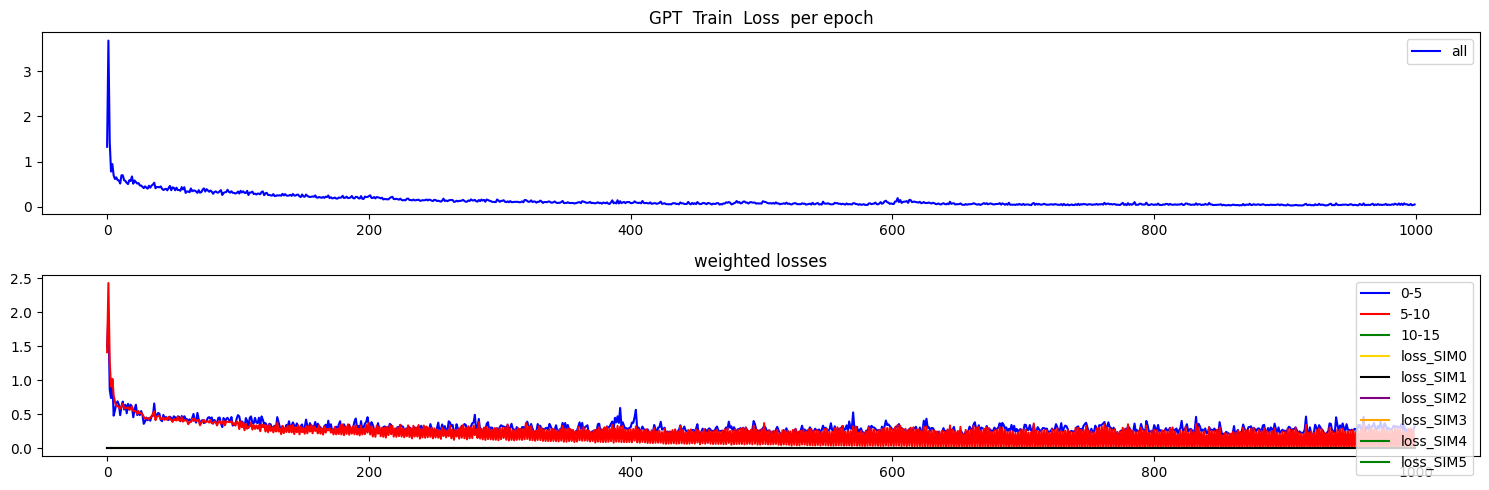

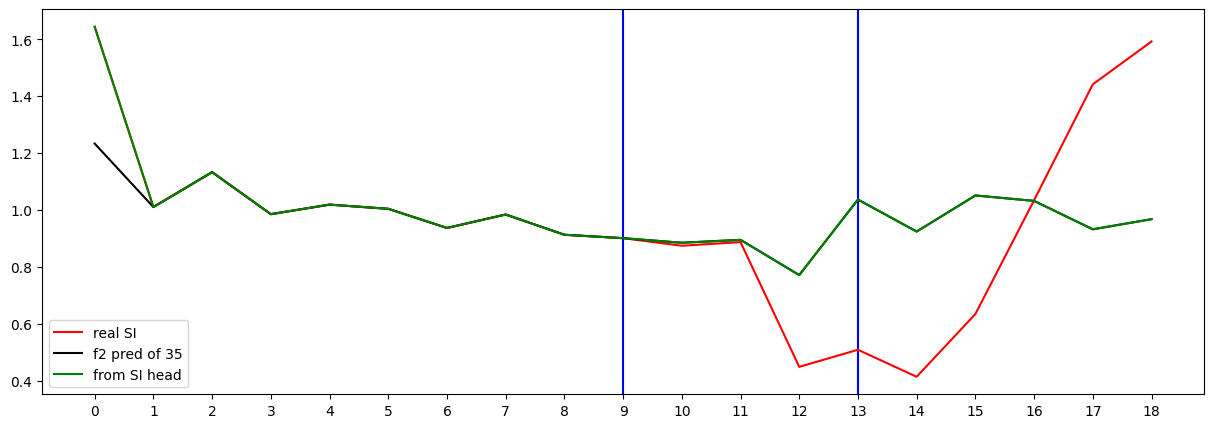

Testing R**2 - (all) - (no inputs):  0.8885603862892713
Testing R**2 - (f2) - SI full (no inputs):  0.09005351491430957
Testing R**2 - SI head only (no inputs):  0.09005351491430957
0 ...index R**2 (no inputs):  -0.8326851362796819
1 ...index R**2 (no inputs):  0.11746808175677137
2 ...index R**2 (no inputs):  0.09005351491430957
3 ...index R**2 (no inputs):  -0.908098985066538
4 ...index R**2 (no inputs):  -0.2281400501335651
5 ...index R**2 (no inputs):  -0.39798436477234045
6 ...index R**2 (no inputs):  -0.4329345207609496
7 ...index R**2 (no inputs):  -0.08792546166061888
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.9244166648981142
10 ...index R**2 (no inputs):  -0.013167386219027799
11 ...index R**2 (no inputs):  -384.5362292574506
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4256148411545344
16 ...index R**2 (no inputs):  -0.5444228224100227
17 ...index R**2 (no in

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.188838
Loss_SI: 1.509348750114441 Loss_all: 1.2332653999328613
===
[200] Train Loss: 0.197581
Loss_SI: 0.36321020126342773 Loss_all: 0.30113738775253296
===
[400] Train Loss: 0.135015
Loss_SI: 0.3343678414821625 Loss_all: 0.3044396936893463
===
[600] Train Loss: 0.076915
Loss_SI: 0.3970097601413727 Loss_all: 0.2892470359802246
===
[800] Train Loss: 0.052306
Loss_SI: 0.2158384770154953 Loss_all: 0.24613797664642334
===


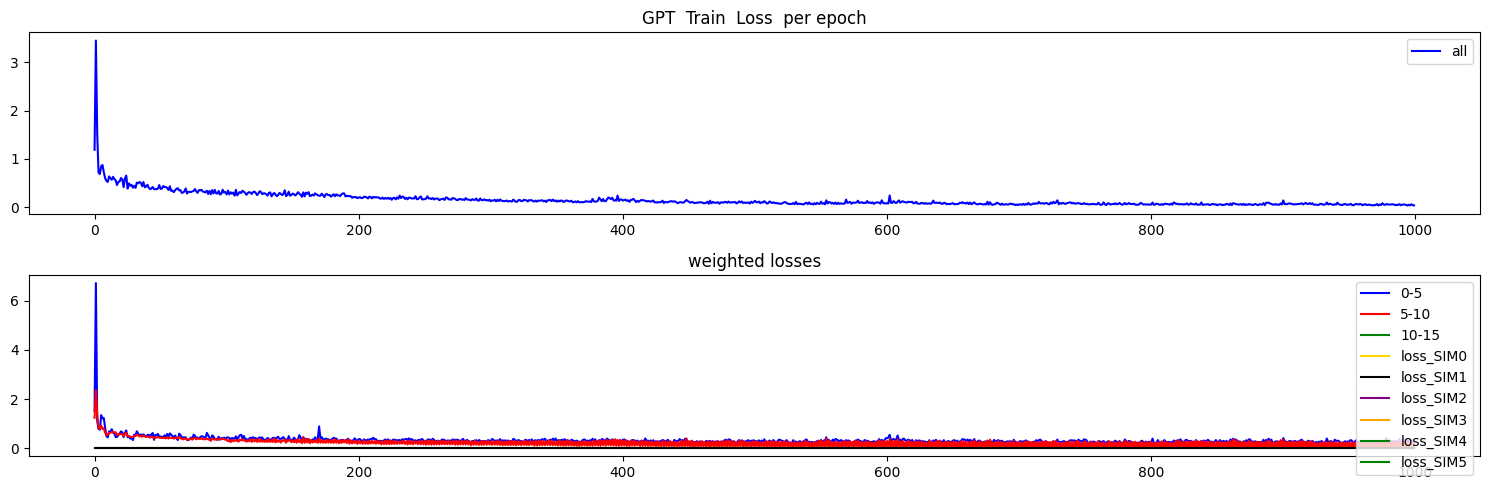

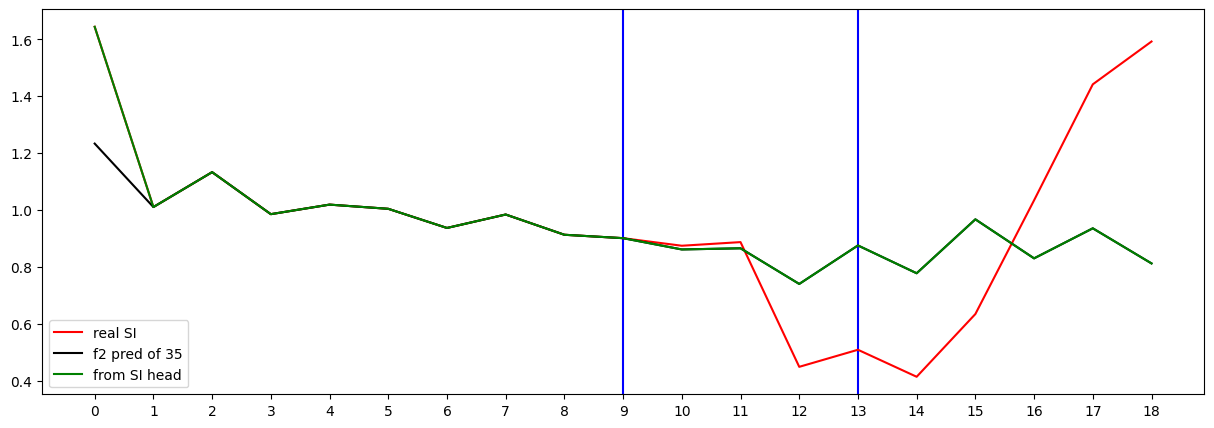

Testing R**2 - (all) - (no inputs):  0.892755924213239
Testing R**2 - (f2) - SI full (no inputs):  0.008431976188322254
Testing R**2 - SI head only (no inputs):  0.008431976188322254
0 ...index R**2 (no inputs):  -0.5381378412640356
1 ...index R**2 (no inputs):  0.042499266143118275
2 ...index R**2 (no inputs):  0.008431976188322254
3 ...index R**2 (no inputs):  -1.6460835872955082
4 ...index R**2 (no inputs):  -0.9003502082684163
5 ...index R**2 (no inputs):  -0.3432872387173196
6 ...index R**2 (no inputs):  -6.859359259760457
7 ...index R**2 (no inputs):  -0.26885736238964975
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3590581149962362
10 ...index R**2 (no inputs):  0.0099184911722775
11 ...index R**2 (no inputs):  -214.22153424757434
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.40474485301001484
16 ...index R**2 (no inputs):  -0.45120583265805103
17 ...index R**2 (no 

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [40]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.241254
Loss_SI: 1.1701239347457886 Loss_all: 1.0647677183151245
===
[200] Train Loss: 0.060136
Loss_SI: 0.44800373911857605 Loss_all: 0.4270547926425934
===
[400] Train Loss: 0.041982
Loss_SI: 0.3842267692089081 Loss_all: 0.4571588933467865
===
[600] Train Loss: 0.050334
Loss_SI: 0.3528163433074951 Loss_all: 0.37701427936553955
===
[800] Train Loss: 0.027742
Loss_SI: 0.4739442765712738 Loss_all: 0.4748914837837219
===


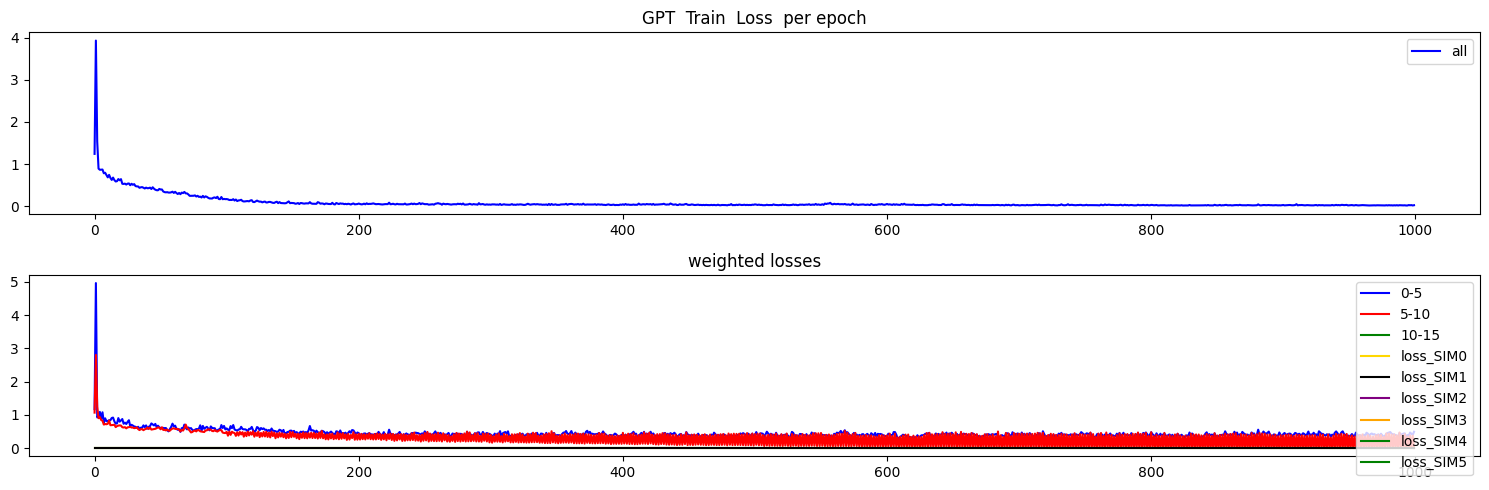

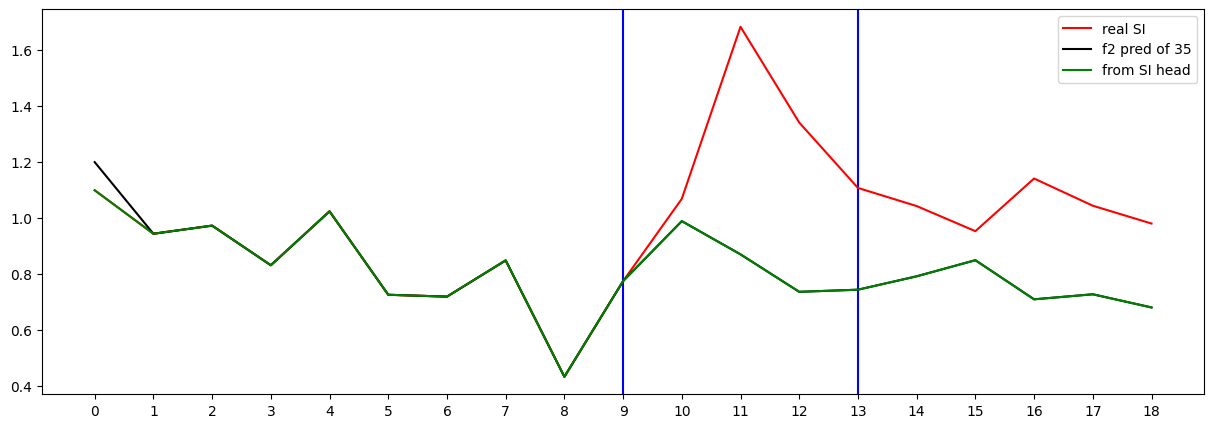

Testing R**2 - (all) - (no inputs):  0.9822035386098505
Testing R**2 - (f2) - SI full (no inputs):  -2.3528649612851296
Testing R**2 - SI head only (no inputs):  -2.3528649612851296
0 ...index R**2 (no inputs):  0.6244435907677799
1 ...index R**2 (no inputs):  -5.259326664646674
2 ...index R**2 (no inputs):  -2.3528649612851296
3 ...index R**2 (no inputs):  -4.610694271326889
4 ...index R**2 (no inputs):  0.5507721686778055
5 ...index R**2 (no inputs):  -1.2958350741439655
6 ...index R**2 (no inputs):  0.4668442681015248
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.39461965197634985
10 ...index R**2 (no inputs):  -0.8949467223560268
11 ...index R**2 (no inputs):  -174.66931604846292
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.70100190490293
16 ...index R**2 (no inputs):  -1.6899671144809263
17 ...index R**2 (no inputs):  -647.98792614020

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.096570
Loss_SI: 1.2082756757736206 Loss_all: 1.1376161575317383
===
[200] Train Loss: 0.104153
Loss_SI: 0.5712113380432129 Loss_all: 0.4570055305957794
===
[400] Train Loss: 0.037747
Loss_SI: 0.5323850512504578 Loss_all: 0.3577239513397217
===
[600] Train Loss: 0.045633
Loss_SI: 0.48510655760765076 Loss_all: 0.37887245416641235
===
[800] Train Loss: 0.025705
Loss_SI: 0.4303154945373535 Loss_all: 0.3756299614906311
===


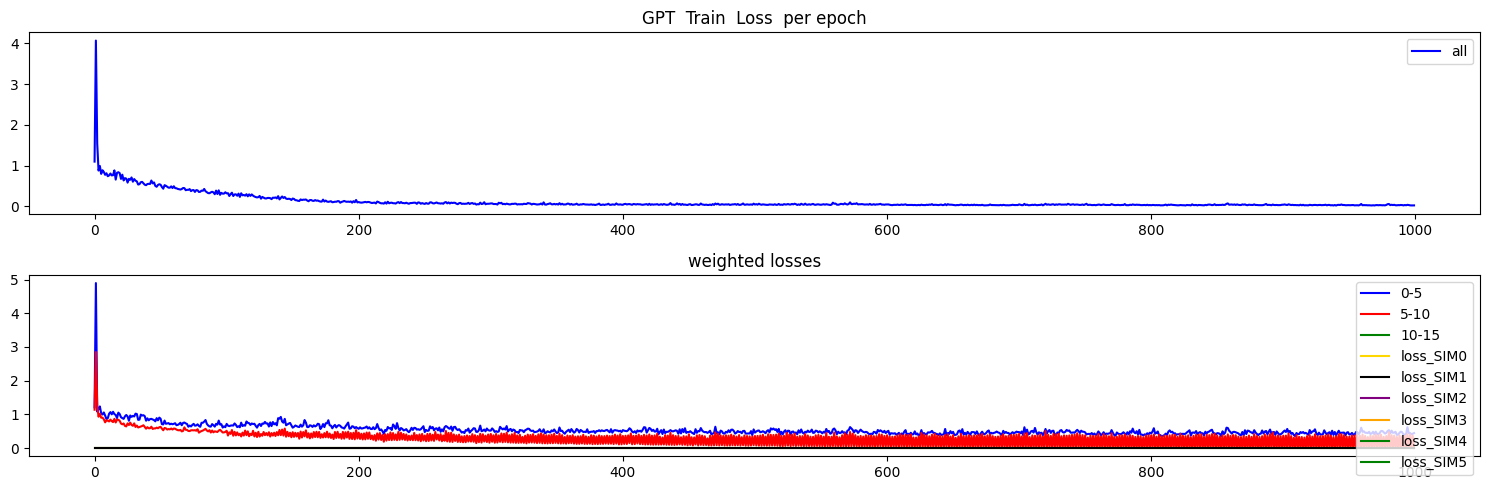

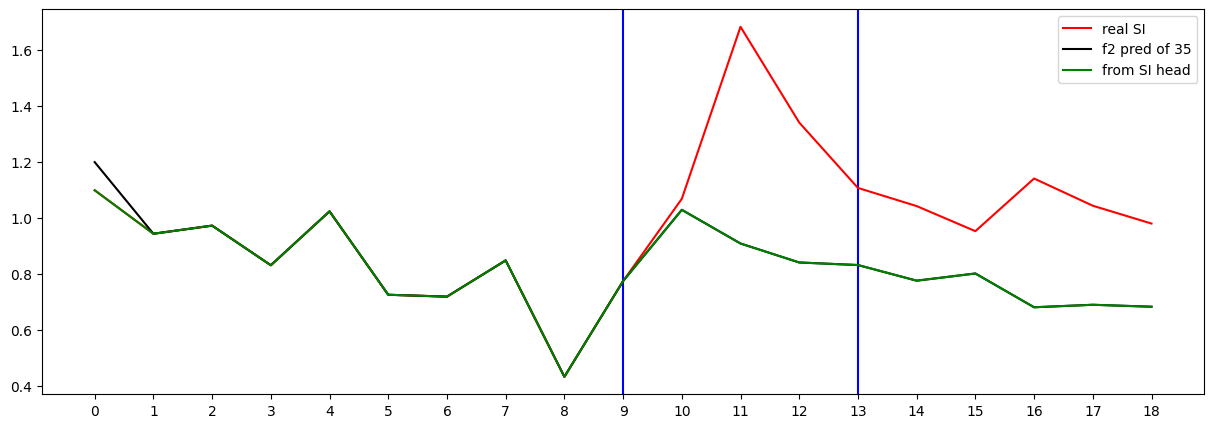

Testing R**2 - (all) - (no inputs):  0.9791375271920271
Testing R**2 - (f2) - SI full (no inputs):  -2.044805985710686
Testing R**2 - SI head only (no inputs):  -2.044805985710686
0 ...index R**2 (no inputs):  0.640454268270187
1 ...index R**2 (no inputs):  -6.180437575618498
2 ...index R**2 (no inputs):  -2.044805985710686
3 ...index R**2 (no inputs):  -2.6192664196753137
4 ...index R**2 (no inputs):  0.6642310387285615
5 ...index R**2 (no inputs):  -1.6961896209011313
6 ...index R**2 (no inputs):  0.5160596201187173
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.0509767354242032
10 ...index R**2 (no inputs):  -0.6225269201300814
11 ...index R**2 (no inputs):  -136.6166771891218
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.8811054010088033
16 ...index R**2 (no inputs):  -0.9462419511915261
17 ...index R**2 (no inputs):  -448.3887268872172


In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.294291
Loss_SI: 1.7216907739639282 Loss_all: 1.2219791412353516
===
[200] Train Loss: 0.185728
Loss_SI: 0.6421926021575928 Loss_all: 0.40130162239074707
===
[400] Train Loss: 0.069263
Loss_SI: 0.500324547290802 Loss_all: 0.29449743032455444
===
[600] Train Loss: 0.041871
Loss_SI: 0.43947991728782654 Loss_all: 0.27032262086868286
===
[800] Train Loss: 0.034717
Loss_SI: 0.41927146911621094 Loss_all: 0.25093185901641846
===


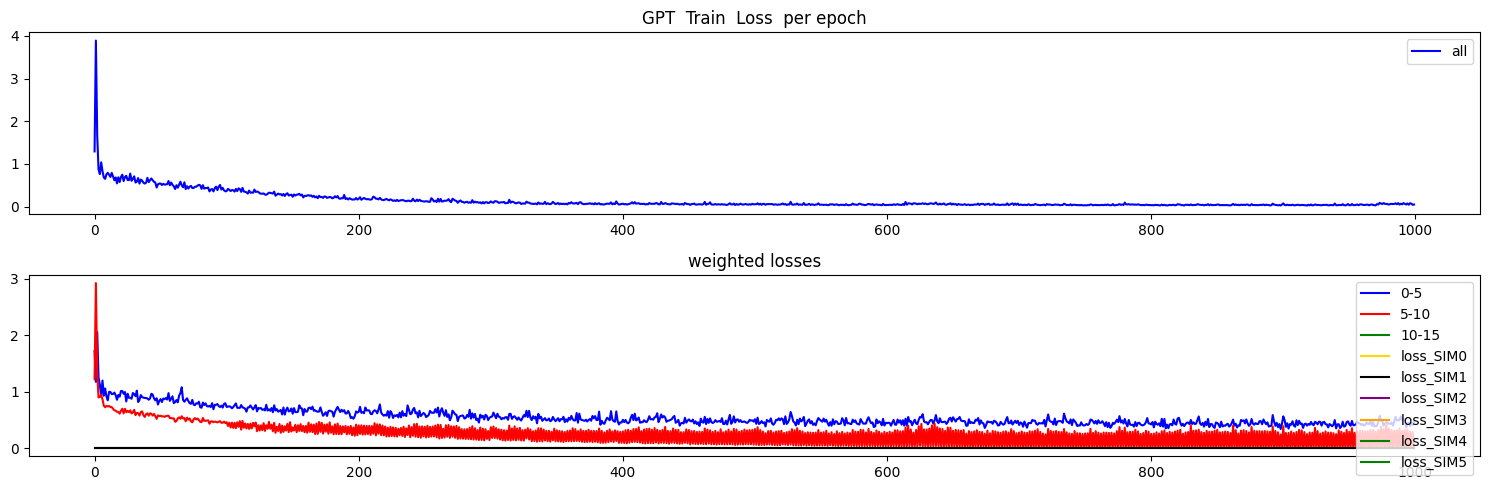

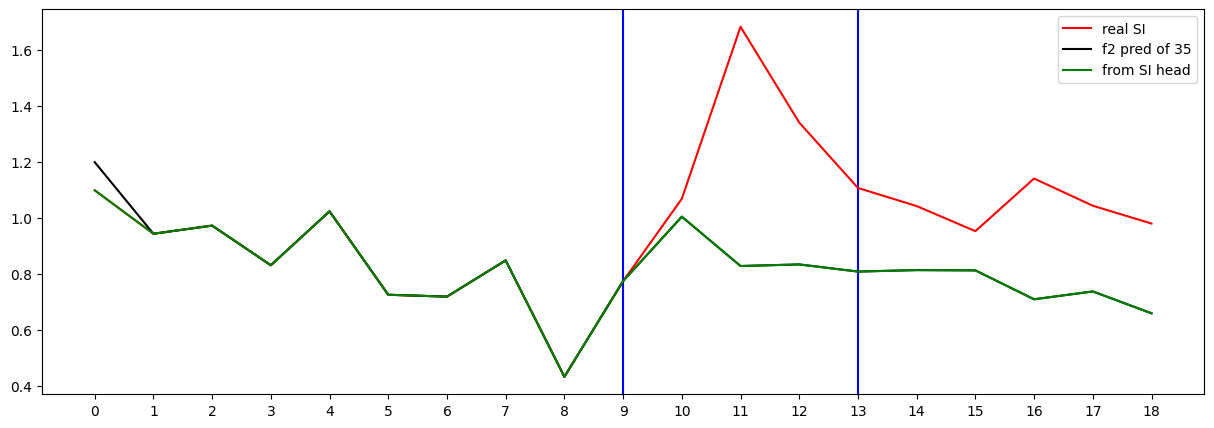

Testing R**2 - (all) - (no inputs):  0.9726650196012937
Testing R**2 - (f2) - SI full (no inputs):  -2.2332374048242483
Testing R**2 - SI head only (no inputs):  -2.2332374048242483
0 ...index R**2 (no inputs):  0.49496221103041915
1 ...index R**2 (no inputs):  -5.745325693214703
2 ...index R**2 (no inputs):  -2.2332374048242483
3 ...index R**2 (no inputs):  -2.3559407550170106
4 ...index R**2 (no inputs):  0.4288630467123652
5 ...index R**2 (no inputs):  -2.5393859102798513
6 ...index R**2 (no inputs):  0.24189423558420298
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5163516824532359
10 ...index R**2 (no inputs):  -1.1640047747595443
11 ...index R**2 (no inputs):  -303.89863373188126
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.988903351568894
16 ...index R**2 (no inputs):  -1.632658258331638
17 ...index R**2 (no inputs):  -366.706677477

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.265491
Loss_SI: 1.1597791910171509 Loss_all: 1.3092924356460571
===
[200] Train Loss: 0.233605
Loss_SI: 0.6422592401504517 Loss_all: 0.38965171575546265
===
[400] Train Loss: 0.087870
Loss_SI: 0.4541935622692108 Loss_all: 0.29500290751457214
===
[600] Train Loss: 0.093062
Loss_SI: 0.4312950670719147 Loss_all: 0.3511410653591156
===
[800] Train Loss: 0.042072
Loss_SI: 0.39768317341804504 Loss_all: 0.29646745324134827
===


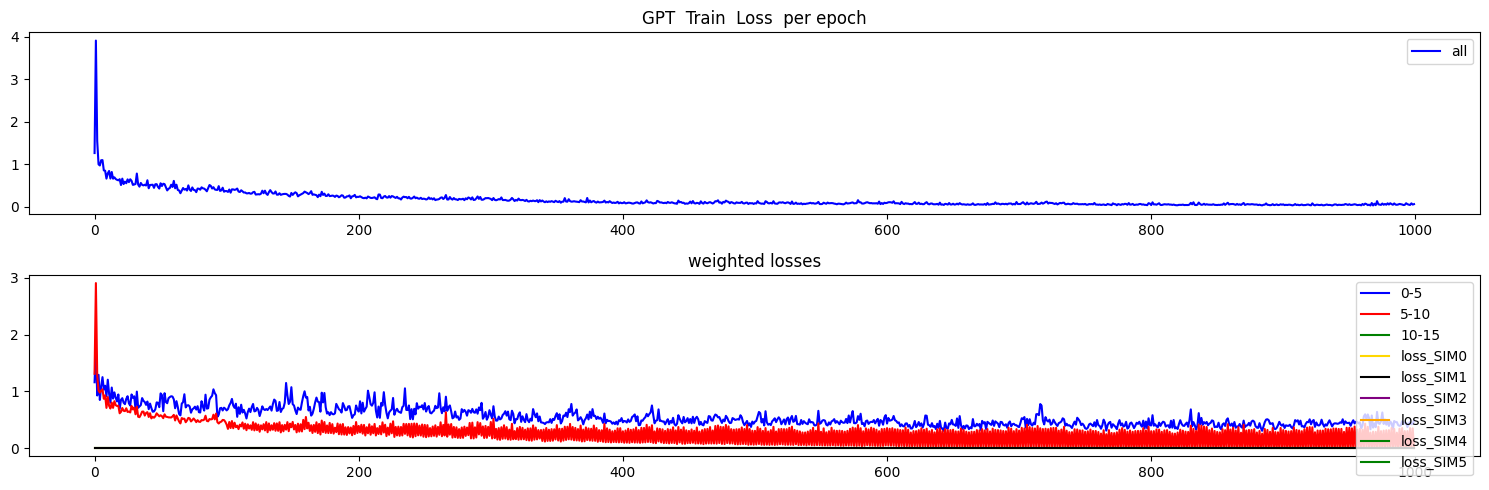

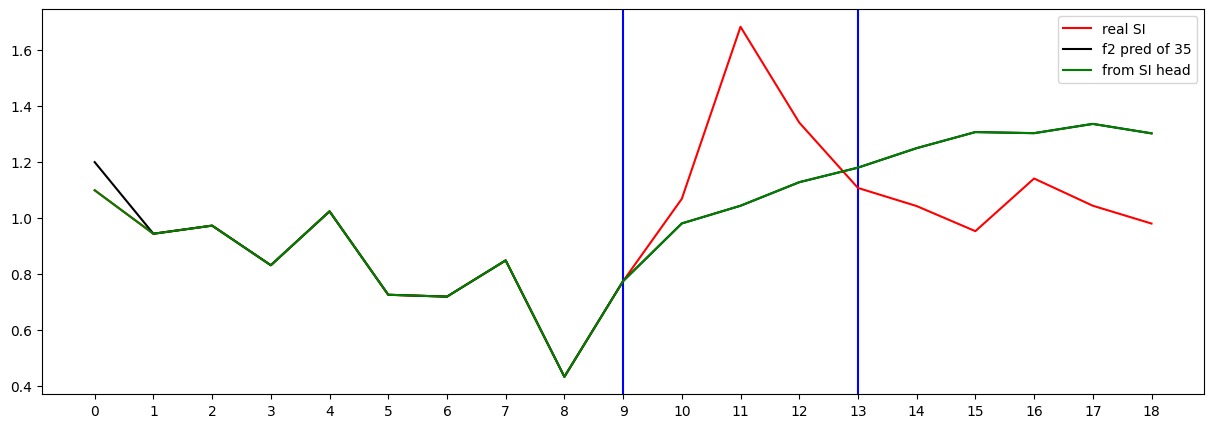

Testing R**2 - (all) - (no inputs):  0.9527372129940634
Testing R**2 - (f2) - SI full (no inputs):  -1.291227403989582
Testing R**2 - SI head only (no inputs):  -1.291227403989582
0 ...index R**2 (no inputs):  0.15909958029061677
1 ...index R**2 (no inputs):  -2.7427768840504
2 ...index R**2 (no inputs):  -1.291227403989582
3 ...index R**2 (no inputs):  -7.868299257759642
4 ...index R**2 (no inputs):  -0.5510996618301902
5 ...index R**2 (no inputs):  -5.111682262040239
6 ...index R**2 (no inputs):  -0.4456904856189863
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.05386958711783
10 ...index R**2 (no inputs):  -2.3398178455392715
11 ...index R**2 (no inputs):  -121.37933638884628
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.367879704286992
16 ...index R**2 (no inputs):  -1.2800388558735691
17 ...index R**2 (no inputs):  -1093.9801039502022
1

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [45]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.311001
Loss_SI: 1.3930237293243408 Loss_all: 1.1906293630599976
===
[200] Train Loss: 0.052344
Loss_SI: 0.4652588963508606 Loss_all: 0.3759695887565613
===
[400] Train Loss: 0.038908
Loss_SI: 0.9922032356262207 Loss_all: 0.5107171535491943
===
[600] Train Loss: 0.028349
Loss_SI: 0.9773638844490051 Loss_all: 0.45731183886528015
===
[800] Train Loss: 0.017448
Loss_SI: 0.8696333765983582 Loss_all: 0.4491506814956665
===


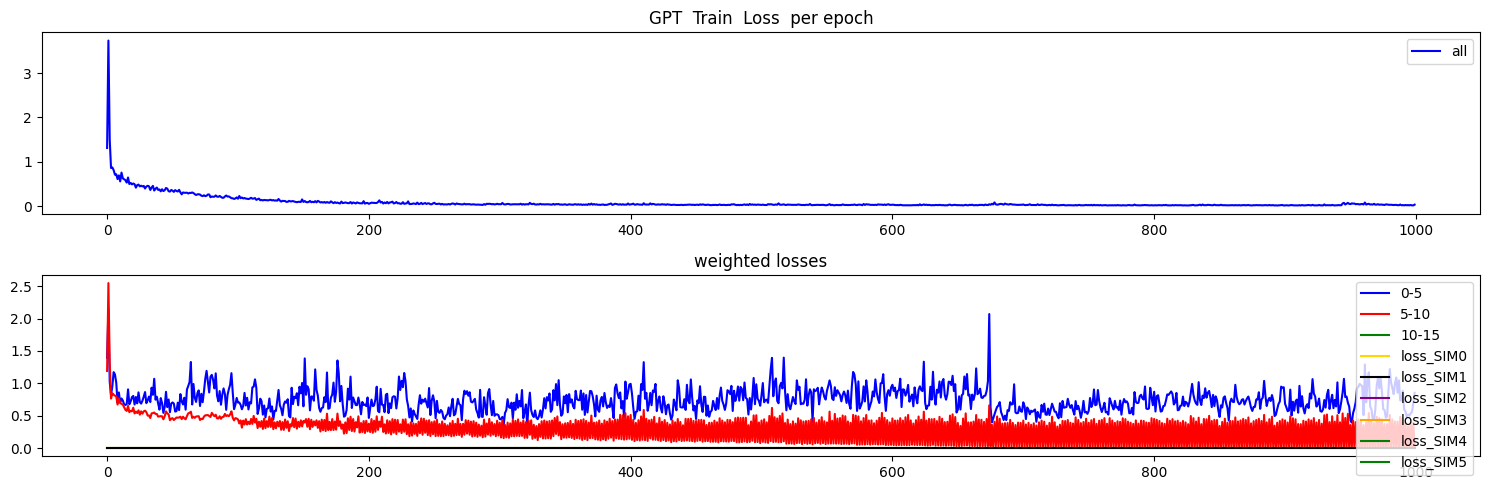

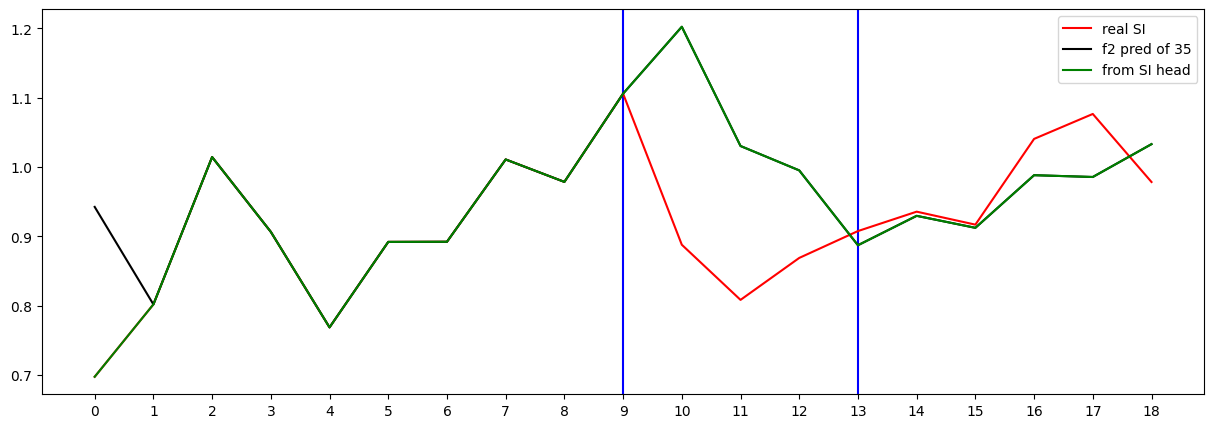

Testing R**2 - (all) - (no inputs):  0.9665988699884248
Testing R**2 - (f2) - SI full (no inputs):  -2.0630006250029167
Testing R**2 - SI head only (no inputs):  -2.0630006250029167
0 ...index R**2 (no inputs):  -1.4982225762469512
1 ...index R**2 (no inputs):  -0.7365195859769267
2 ...index R**2 (no inputs):  -2.0630006250029167
3 ...index R**2 (no inputs):  -10.152328865595777
4 ...index R**2 (no inputs):  -20.97772007160768
5 ...index R**2 (no inputs):  -1.4669125665907536
6 ...index R**2 (no inputs):  -371.58180198205105
7 ...index R**2 (no inputs):  -2.932239169522845
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.37622338223225804
10 ...index R**2 (no inputs):  -1.8355440210365788
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.89155747192551
16 ...index R**2 (no inputs):  -0.5821991097889763
17 ...index R**2 (no inputs):  -42.503055572

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.267001
Loss_SI: 1.3150634765625 Loss_all: 1.2341928482055664
===
[200] Train Loss: 0.140388
Loss_SI: 0.5888972282409668 Loss_all: 0.36765486001968384
===
[400] Train Loss: 0.060070
Loss_SI: 0.6451371312141418 Loss_all: 0.3685501515865326
===
[600] Train Loss: 0.034982
Loss_SI: 0.4035429060459137 Loss_all: 0.3397256135940552
===
[800] Train Loss: 0.043042
Loss_SI: 0.5230606198310852 Loss_all: 0.3890741467475891
===


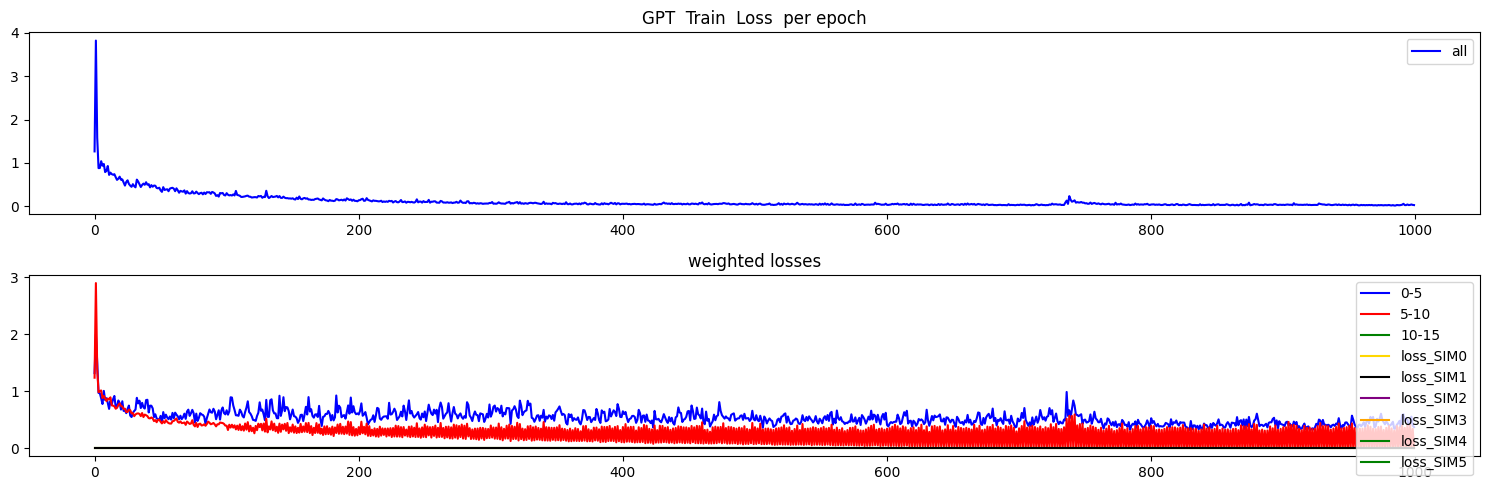

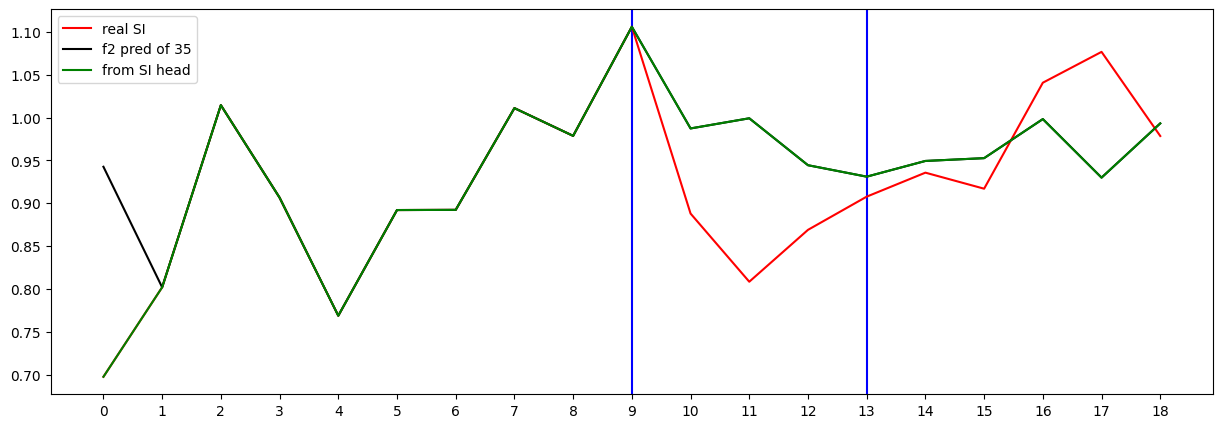

Testing R**2 - (all) - (no inputs):  0.968425028705554
Testing R**2 - (f2) - SI full (no inputs):  -0.44609568904164454
Testing R**2 - SI head only (no inputs):  -0.44609568904164454
0 ...index R**2 (no inputs):  -0.4697124661392924
1 ...index R**2 (no inputs):  -0.12863123631399032
2 ...index R**2 (no inputs):  -0.44609568904164454
3 ...index R**2 (no inputs):  -12.245713971504289
4 ...index R**2 (no inputs):  -40.305976369882835
5 ...index R**2 (no inputs):  -1.3284215893015636
6 ...index R**2 (no inputs):  -268.6439239939086
7 ...index R**2 (no inputs):  -3.175653646543002
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.36778531445325924
10 ...index R**2 (no inputs):  -0.6640872974504821
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.430384463362375
16 ...index R**2 (no inputs):  -1.0041580194025186
17 ...index R**2 (no inputs):  -127.3920

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.190517
Loss_SI: 1.274954915046692 Loss_all: 1.1382328271865845
===
[200] Train Loss: 0.199350
Loss_SI: 0.45232126116752625 Loss_all: 0.3358415961265564
===
[400] Train Loss: 0.065923
Loss_SI: 0.25346553325653076 Loss_all: 0.2506120800971985
===
[600] Train Loss: 0.039756
Loss_SI: 0.23427844047546387 Loss_all: 0.24642634391784668
===
[800] Train Loss: 0.052264
Loss_SI: 0.32184115052223206 Loss_all: 0.28811371326446533
===


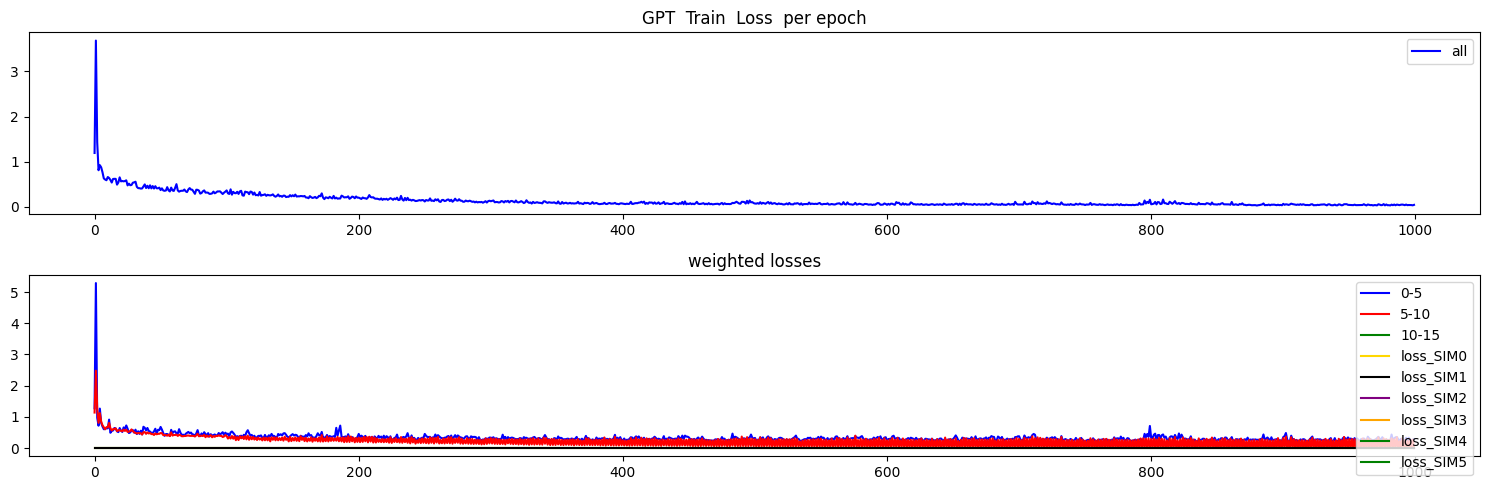

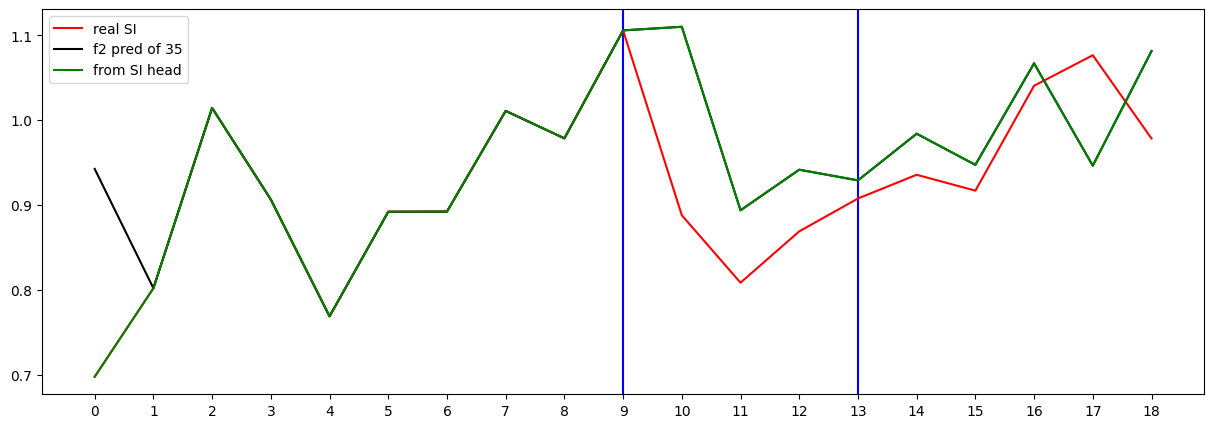

Testing R**2 - (all) - (no inputs):  0.9740024904166608
Testing R**2 - (f2) - SI full (no inputs):  -1.3755503930342634
Testing R**2 - SI head only (no inputs):  -1.3755503930342634
0 ...index R**2 (no inputs):  -1.9024633341740032
1 ...index R**2 (no inputs):  -0.6064853411542988
2 ...index R**2 (no inputs):  -1.3755503930342634
3 ...index R**2 (no inputs):  -10.380706441594295
4 ...index R**2 (no inputs):  -141.19383097461022
5 ...index R**2 (no inputs):  -0.9183344038359722
6 ...index R**2 (no inputs):  -24.442681821554682
7 ...index R**2 (no inputs):  -3.47745018544222
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4058381100152648
10 ...index R**2 (no inputs):  -1.171761485718334
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.686262552650788
16 ...index R**2 (no inputs):  -0.37713032970374627
17 ...index R**2 (no inputs):  -11.016547413

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.326713
Loss_SI: 1.4698526859283447 Loss_all: 1.2793242931365967
===
[200] Train Loss: 0.211587
Loss_SI: 0.43805012106895447 Loss_all: 0.3507053554058075
===
[400] Train Loss: 0.112224
Loss_SI: 0.2455916702747345 Loss_all: 0.2747674882411957
===
[600] Train Loss: 0.077885
Loss_SI: 0.44264474511146545 Loss_all: 0.3196490406990051
===
[800] Train Loss: 0.058378
Loss_SI: 0.29105326533317566 Loss_all: 0.2711467742919922
===


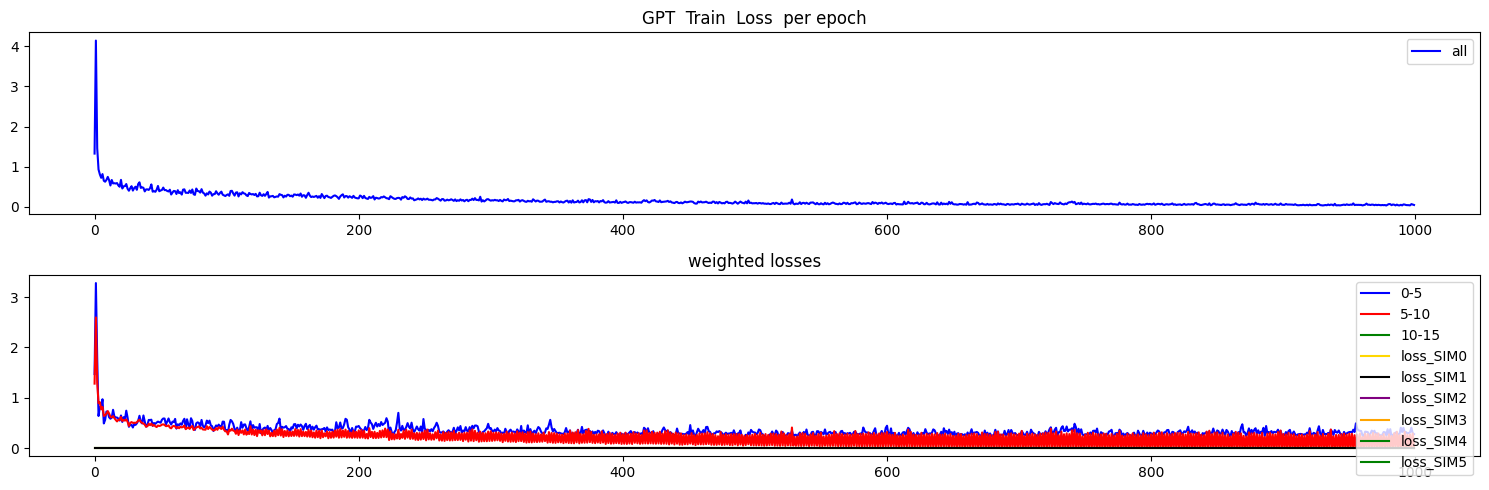

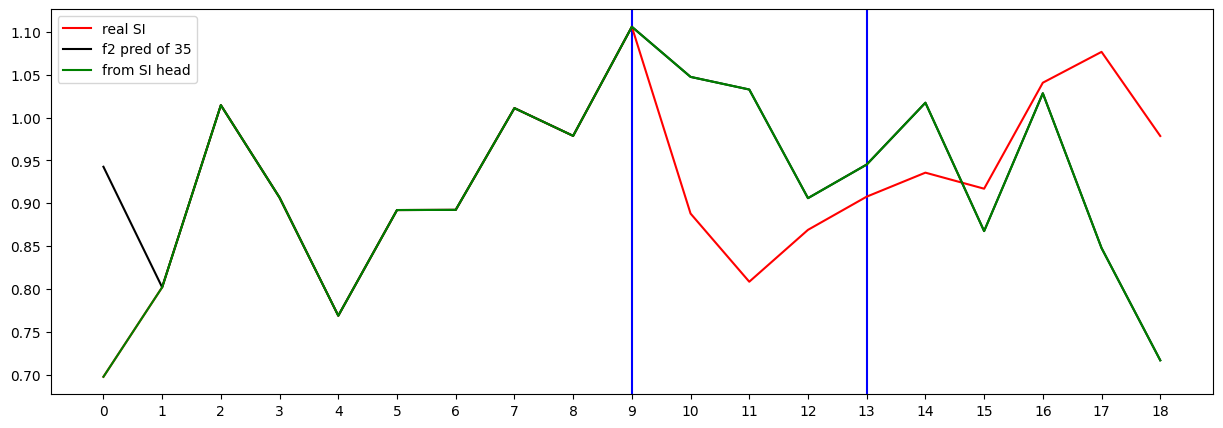

Testing R**2 - (all) - (no inputs):  0.976727854646147
Testing R**2 - (f2) - SI full (no inputs):  -0.342000017227837
Testing R**2 - SI head only (no inputs):  -0.342000017227837
0 ...index R**2 (no inputs):  -0.8382133681225059
1 ...index R**2 (no inputs):  -0.09992789527203749
2 ...index R**2 (no inputs):  -0.342000017227837
3 ...index R**2 (no inputs):  -0.29037688180106014
4 ...index R**2 (no inputs):  -40.29117173119624
5 ...index R**2 (no inputs):  -0.7108914758425986
6 ...index R**2 (no inputs):  -213.59176736428137
7 ...index R**2 (no inputs):  -2.296466374820918
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.06664843911913709
10 ...index R**2 (no inputs):  0.15191138350101496
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.6903148796170986
16 ...index R**2 (no inputs):  -1.1206698407478868
17 ...index R**2 (no inputs):  -1154.9109924

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 6


In [50]:


chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()



[0] Train Loss: 1.171095
Loss_SI: 1.3659213781356812 Loss_all: 1.1446921825408936
===
[200] Train Loss: 0.070958
Loss_SI: 0.5567351579666138 Loss_all: 0.8057950139045715
===
[400] Train Loss: 0.032906
Loss_SI: 0.5667720437049866 Loss_all: 0.4020097553730011
===
[600] Train Loss: 0.028754
Loss_SI: 0.48476096987724304 Loss_all: 0.4108356535434723
===
[800] Train Loss: 0.023731
Loss_SI: 0.4693889617919922 Loss_all: 0.3762401342391968
===


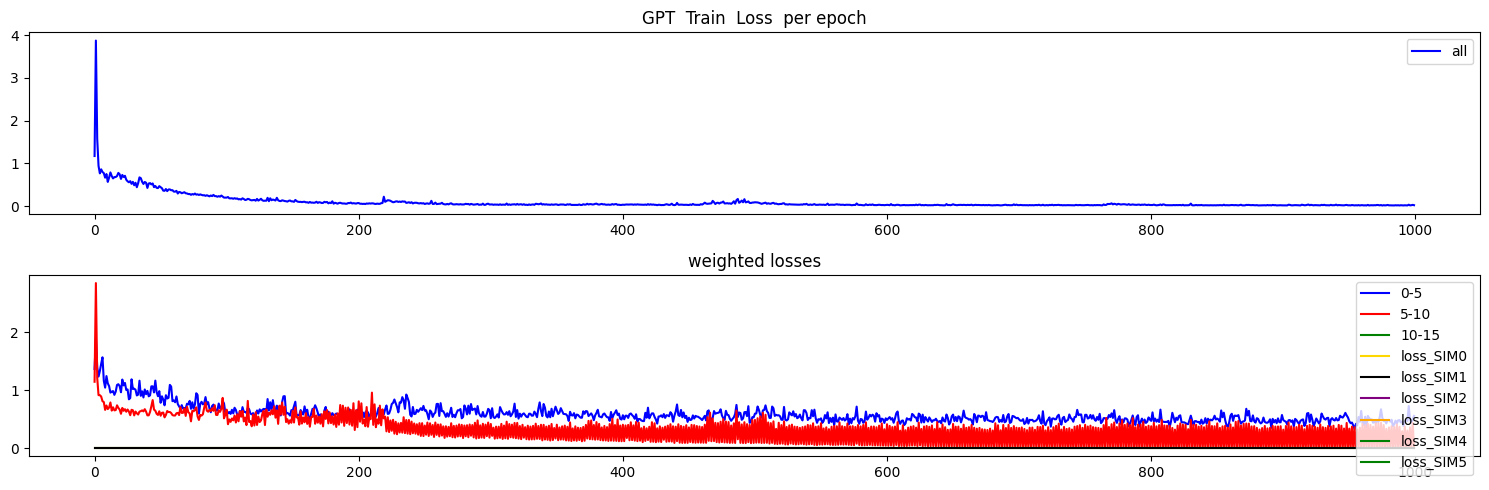

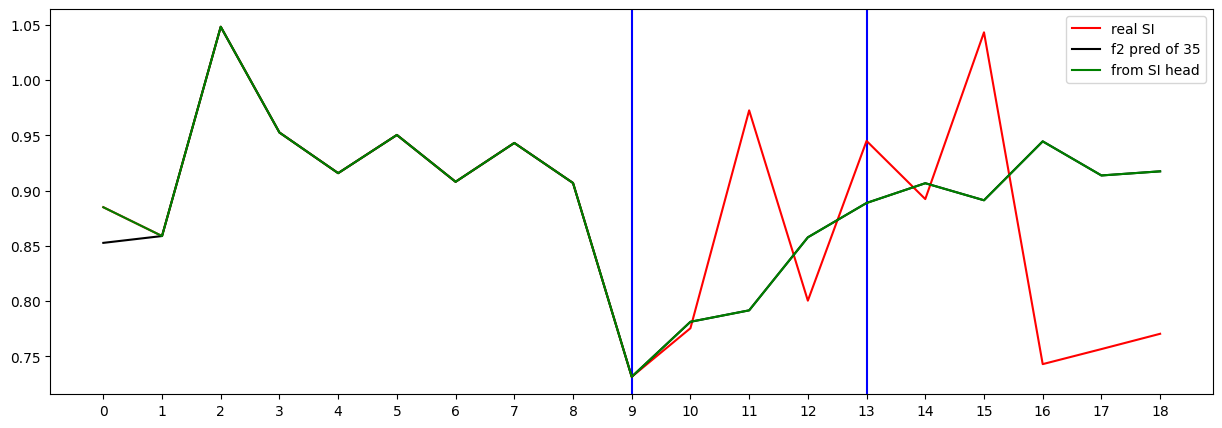

Testing R**2 - (all) - (no inputs):  0.9958086453017567
Testing R**2 - (f2) - SI full (no inputs):  -0.5660133922742236
Testing R**2 - SI head only (no inputs):  -0.5660133922742236
0 ...index R**2 (no inputs):  0.021706979566495588
1 ...index R**2 (no inputs):  0.01742305952131129
2 ...index R**2 (no inputs):  -0.5660133922742236
3 ...index R**2 (no inputs):  -1.0124717001721009
4 ...index R**2 (no inputs):  -0.5274820082014751
5 ...index R**2 (no inputs):  0.056052404107740594
6 ...index R**2 (no inputs):  -0.2852660497095114
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.5285690483460055
10 ...index R**2 (no inputs):  -1.1286373670665788
11 ...index R**2 (no inputs):  0.16899921264950668
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.43040973890130263
16 ...index R**2 (no inputs):  -0.46595874207756527
17 ...index R**2 (no inputs):  -0.596

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )



[0] Train Loss: 1.305678
Loss_SI: 1.6012152433395386 Loss_all: 1.2952146530151367
===
[200] Train Loss: 0.107886
Loss_SI: 0.4299014210700989 Loss_all: 0.3146570324897766
===
[400] Train Loss: 0.037240
Loss_SI: 0.31732305884361267 Loss_all: 0.25515154004096985
===
[600] Train Loss: 0.043711
Loss_SI: 0.43116673827171326 Loss_all: 0.2802794873714447
===
[800] Train Loss: 0.039194
Loss_SI: 0.4282090365886688 Loss_all: 0.2713785171508789
===


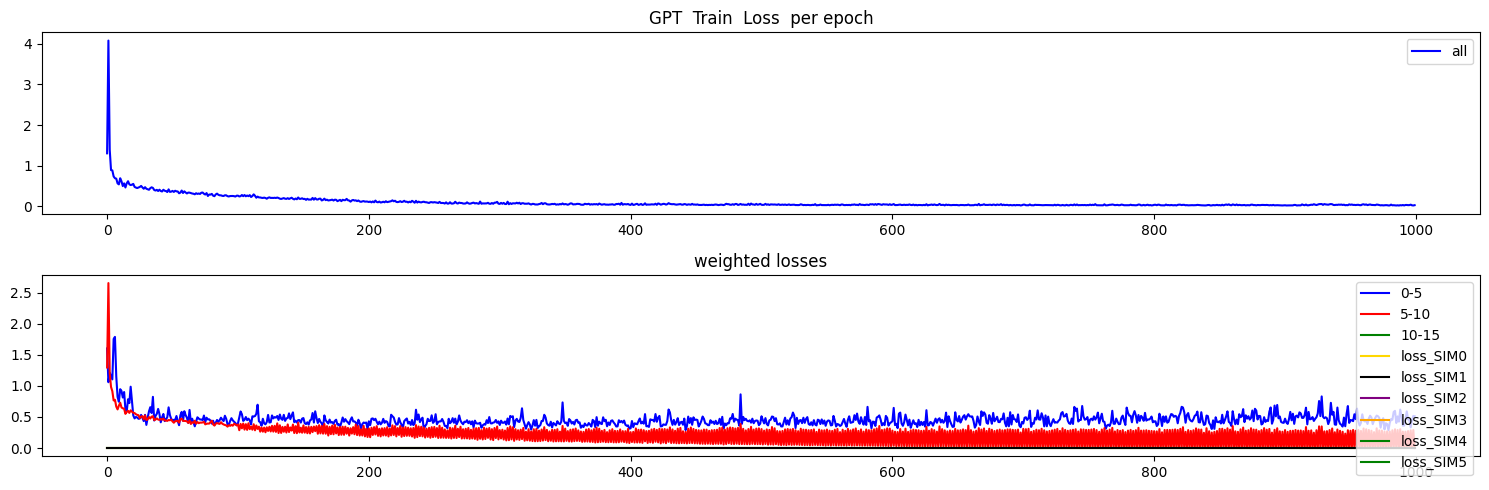

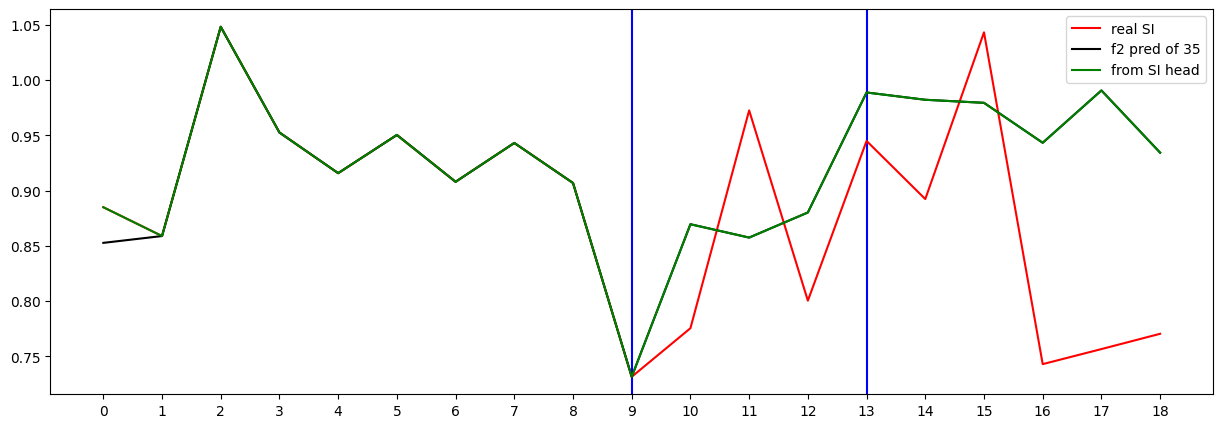

Testing R**2 - (all) - (no inputs):  0.9946500113620104
Testing R**2 - (f2) - SI full (no inputs):  -0.9077632189617266
Testing R**2 - SI head only (no inputs):  -0.9077632189617266
0 ...index R**2 (no inputs):  0.021142702566488758
1 ...index R**2 (no inputs):  -0.3303566357021097
2 ...index R**2 (no inputs):  -0.9077632189617266
3 ...index R**2 (no inputs):  -0.6078961055567931
4 ...index R**2 (no inputs):  -6.030614231109202
5 ...index R**2 (no inputs):  -0.20417814122944367
6 ...index R**2 (no inputs):  -0.6457931327708435
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3142371063088143
10 ...index R**2 (no inputs):  -0.46883091905636176
11 ...index R**2 (no inputs):  0.2884156210194416
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.4311764016040879
16 ...index R**2 (no inputs):  0.03620320367136931
17 ...index R**2 (no inputs):  -0.3801842

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.183313
Loss_SI: 1.0912479162216187 Loss_all: 1.16883385181427
===
[200] Train Loss: 0.159948
Loss_SI: 0.46017226576805115 Loss_all: 0.36694684624671936
===
[400] Train Loss: 0.059097
Loss_SI: 0.35531532764434814 Loss_all: 0.3102037310600281
===
[600] Train Loss: 0.046037
Loss_SI: 0.33024418354034424 Loss_all: 0.2404278814792633
===
[800] Train Loss: 0.037550
Loss_SI: 0.489894837141037 Loss_all: 0.2901526391506195
===


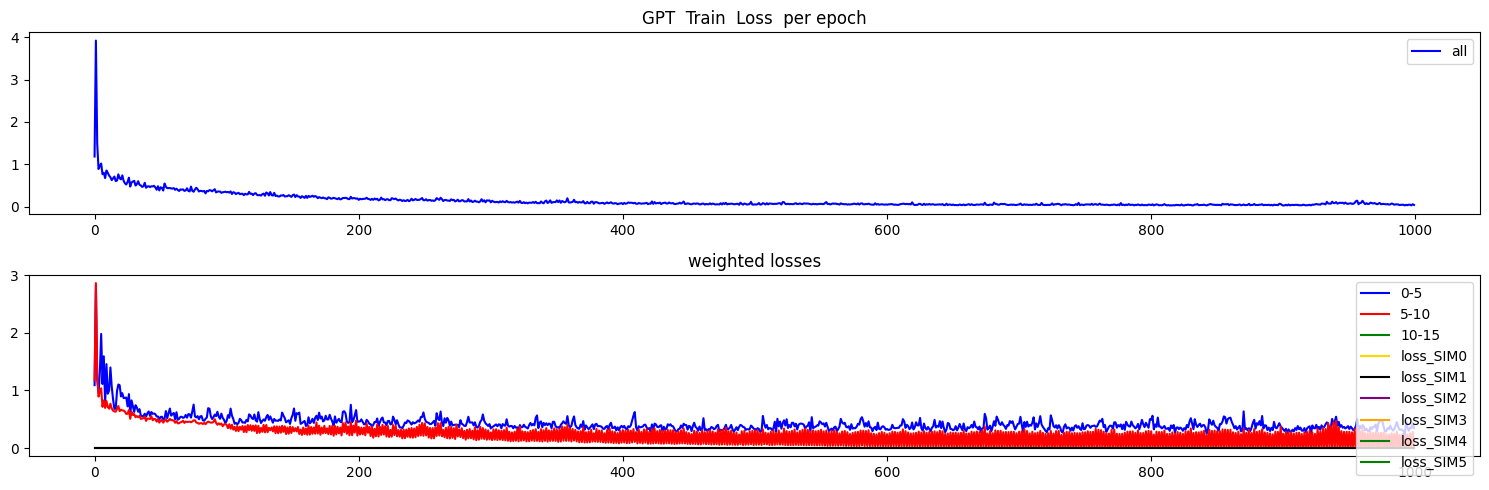

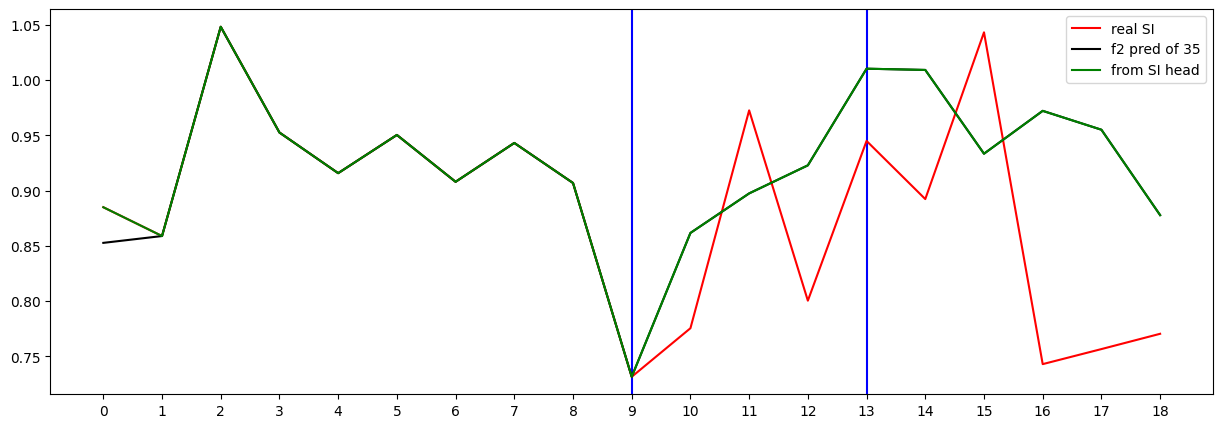

Testing R**2 - (all) - (no inputs):  0.9947420403229695
Testing R**2 - (f2) - SI full (no inputs):  -0.702113657976233
Testing R**2 - SI head only (no inputs):  -0.702113657976233
0 ...index R**2 (no inputs):  0.13456916961248155
1 ...index R**2 (no inputs):  -1.037043645947914
2 ...index R**2 (no inputs):  -0.702113657976233
3 ...index R**2 (no inputs):  -0.5881126375139603
4 ...index R**2 (no inputs):  -0.29306835684536137
5 ...index R**2 (no inputs):  -0.18426214464041557
6 ...index R**2 (no inputs):  -0.8203246618391735
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3358065201612348
10 ...index R**2 (no inputs):  -0.9074743908239111
11 ...index R**2 (no inputs):  -0.03476574959568279
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4681597809010616
16 ...index R**2 (no inputs):  -0.11057723105995354
17 ...index R**2 (no inputs):  -8.0486828

In [53]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )



[0] Train Loss: 1.245650
Loss_SI: 1.5213361978530884 Loss_all: 1.30769681930542
===
[200] Train Loss: 0.201740
Loss_SI: 0.5405654907226562 Loss_all: 0.34651413559913635
===
[400] Train Loss: 0.096096
Loss_SI: 0.5746604204177856 Loss_all: 0.4019397795200348
===
[600] Train Loss: 0.049681
Loss_SI: 0.40266305208206177 Loss_all: 0.2908860146999359
===
[800] Train Loss: 0.055533
Loss_SI: 0.4405301511287689 Loss_all: 0.2968755066394806
===


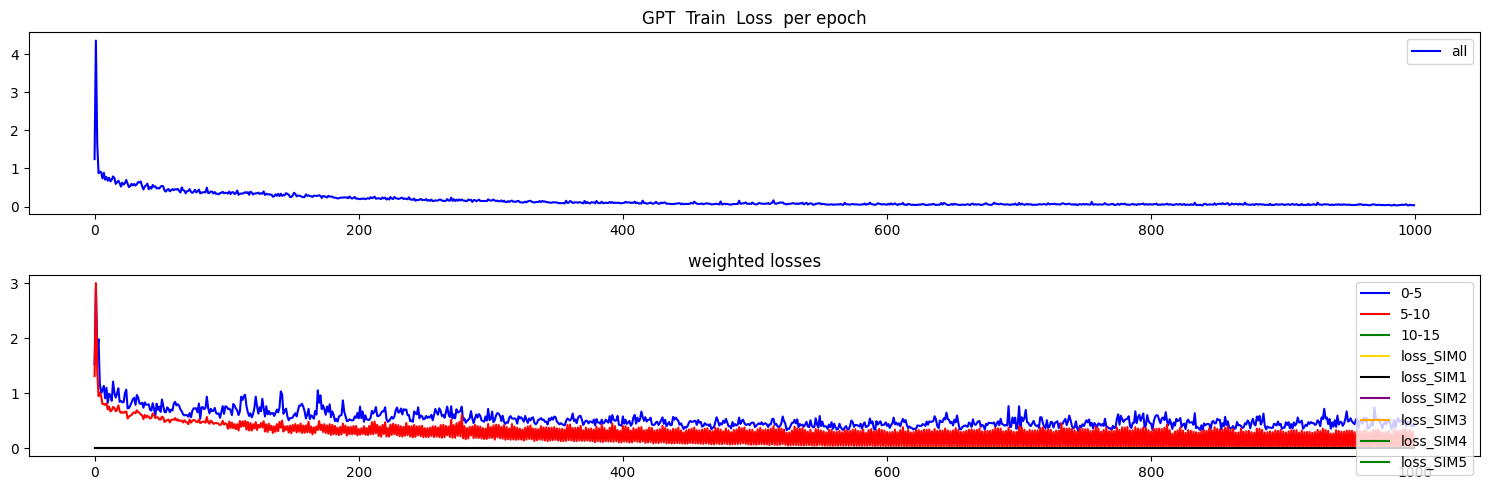

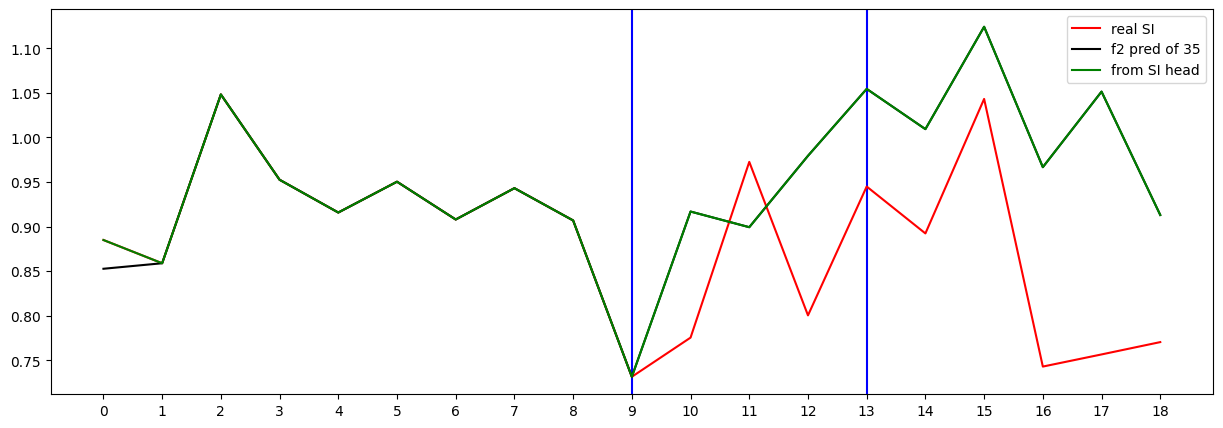

Testing R**2 - (all) - (no inputs):  0.9941955967314501
Testing R**2 - (f2) - SI full (no inputs):  -2.4301738309148364
Testing R**2 - SI head only (no inputs):  -2.4301738309148364
0 ...index R**2 (no inputs):  -0.5539276046280222
1 ...index R**2 (no inputs):  -0.567219141892217
2 ...index R**2 (no inputs):  -2.4301738309148364
3 ...index R**2 (no inputs):  -0.3301786006763996
4 ...index R**2 (no inputs):  0.06380845095539878
5 ...index R**2 (no inputs):  -0.3063633532718899
6 ...index R**2 (no inputs):  -0.4870157359250711
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.1918974354015806
10 ...index R**2 (no inputs):  -0.3364828500837944
11 ...index R**2 (no inputs):  -1.3807287541554123
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.10087178661536567
16 ...index R**2 (no inputs):  -0.32050391369563114
17 ...index R**2 (no inputs):  -4.484061

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [55]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [56]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.2786449512989557


In [57]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.1720184126617872


In [58]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.1623422233231886


In [59]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.08670545823568121



## First Few R2


In [60]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [61]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [62]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....................R² on first n steps - R²: -0.38015202971837847
Naive_R2:....................................R²: 0.4964
RMSE:0.3462,MAE:0.2602,MASE:0.6699
1 .......................R² on just step n - R²: -0.38015202971837847
Naive_R2:....................................R²: 0.4964
RMSE:0.3462,MAE:0.2602,MASE:0.6699
2 .....................R² on first n steps - R²: -0.27052982453684704
Naive_R2:....................................R²: 0.4189
RMSE:0.3265,MAE:0.2614,MASE:0.8889
2 .......................R² on just step n - R²: -0.292466171051905
Naive_R2:....................................R²: 0.6061
RMSE:0.3056,MAE:0.2627,MASE:0.5940
3 .....................R² on first n steps - R²: -0.2680099400785694
Naive_R2:....................................R²: 0.1867
RMSE:0.2965,MAE:0.2351,MASE:1.1295
3 .......................R² on just step n - R²: -0.4764465434182956
Naive_R2:....................................R²: 0.5144
RMSE:0.2246,MAE:0.1825,MASE:0.6367
4 .....................R² on first n s

In [63]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....................R² on first n steps - R²: 0.01171428567942423
Naive_R2:....................................R²: 0.6394
RMSE:0.2929,MAE:0.2063,MASE:0.5311
1 .......................R² on just step n - R²: 0.01171428567942423
Naive_R2:....................................R²: 0.6394
RMSE:0.2929,MAE:0.2063,MASE:0.5311
2 .....................R² on first n steps - R²: 0.03629250467673295
Naive_R2:....................................R²: 0.5592
RMSE:0.2844,MAE:0.2245,MASE:0.7633
2 .......................R² on just step n - R²: -0.05071976195927297
Naive_R2:....................................R²: 0.6797
RMSE:0.2755,MAE:0.2427,MASE:0.5487
3 .....................R² on first n steps - R²: 0.033850929425278564
Naive_R2:....................................R²: 0.3803
RMSE:0.2588,MAE:0.2048,MASE:0.9836
3 .......................R² on just step n - R²: -0.14639415574920345
Naive_R2:....................................R²: 0.6229
RMSE:0.1979,MAE:0.1653,MASE:0.5767
4 .....................R² on first n 

In [64]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....................R² on first n steps - R²: -0.11943391330330311
Naive_R2:....................................R²: 0.5916
RMSE:0.3118,MAE:0.2099,MASE:0.5405
1 .......................R² on just step n - R²: -0.11943391330330311
Naive_R2:....................................R²: 0.5916
RMSE:0.3118,MAE:0.2099,MASE:0.5405
2 .....................R² on first n steps - R²: -0.17983211945043265
Naive_R2:....................................R²: 0.4604
RMSE:0.3146,MAE:0.2371,MASE:0.8062
2 .......................R² on just step n - R²: -0.3950802579544819
Naive_R2:....................................R²: 0.5748
RMSE:0.3175,MAE:0.2643,MASE:0.5976
3 .....................R² on first n steps - R²: -0.0821421885770901
Naive_R2:....................................R²: 0.3059
RMSE:0.2739,MAE:0.2005,MASE:0.9630
3 .......................R² on just step n - R²: 0.20936066063397984
Naive_R2:....................................R²: 0.7399
RMSE:0.1643,MAE:0.1272,MASE:0.4436
4 .....................R² on first n 

In [65]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....................R² on first n steps - R²: -0.18754397076454743
Naive_R2:....................................R²: 0.5667
RMSE:0.3211,MAE:0.2225,MASE:0.5730
1 .......................R² on just step n - R²: -0.18754397076454743
Naive_R2:....................................R²: 0.5667
RMSE:0.3211,MAE:0.2225,MASE:0.5730
2 .....................R² on first n steps - R²: -0.018239012625702378
Naive_R2:....................................R²: 0.5343
RMSE:0.2923,MAE:0.2258,MASE:0.7679
2 .......................R² on just step n - R²: 0.062043821917860065
Naive_R2:....................................R²: 0.7141
RMSE:0.2603,MAE:0.2291,MASE:0.5181
3 .....................R² on first n steps - R²: 0.10732418644058961
Naive_R2:....................................R²: 0.4274
RMSE:0.2487,MAE:0.1773,MASE:0.8520
3 .......................R² on just step n - R²: 0.5687633317139901
Naive_R2:....................................R²: 0.8582
RMSE:0.1214,MAE:0.0804,MASE:0.2804
4 .....................R² on first n


## Plot


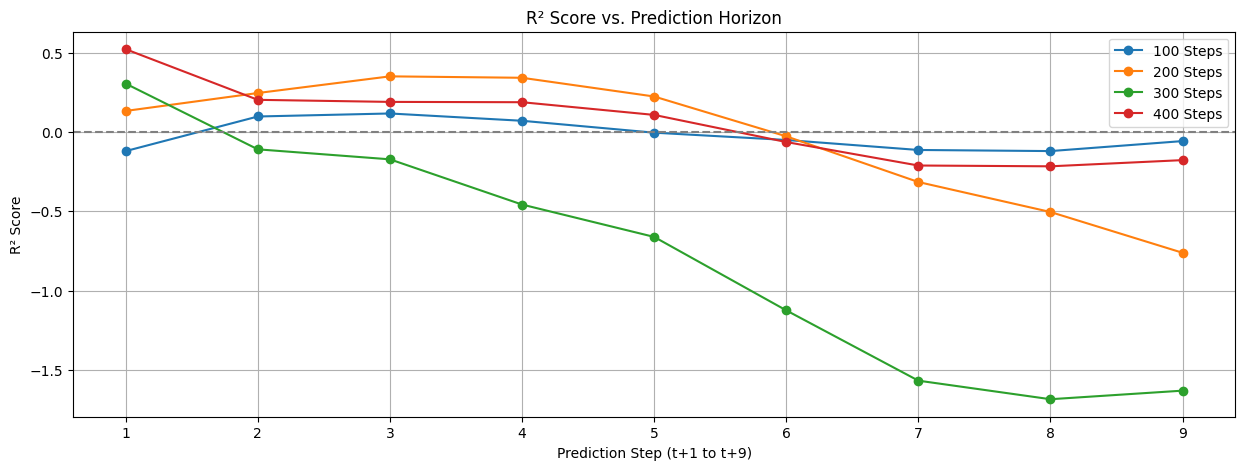

In [66]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
